# Preliminaries


In [1]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)
from numpy import sqrt 
# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalMaxPooling2D,UpSampling2D, Cropping2D # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

import decimal
from decimal import Decimal

import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,MaxPooling2D # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

from pathlib import Path  

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import brier_score_loss

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import plot_model

from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibrationDisplay

import sys



pandas: 1.4.4
geopandas: 1.22.3
Tensorflow/Keras: 2.9.0
pandas: 1.4.4
numpy: 1.22.3


In [15]:
def extract_images(df, variables, verbose=False):
    number_of_img, rows, cols = len(df.time.unique()), len(df.latitude.unique()), len(df.longitude.unique())
    images = np.zeros( (number_of_img, rows, cols, len(variables)) )
    
    df = df.sort_values(by=['time','latitude','longitude'])
    k=0
    
    for day in range(0,number_of_img):
        
        a=df.iloc[377*day:377*(day+1)]
        i=0
        for var in variables:
            images[day,:,:,i] = a.pivot(index='latitude', columns='longitude')[var]
            i+=1
        k+=1
        if (k%100==0) & (verbose==True): print(k)
    return images


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [40]:
test = pd.read_csv('/Users/3rfanian/P_main/extracting data 10 variable/dataframes/Windows/10vars/test_windows_10var_2019.csv')
test = test.drop(columns=['Unnamed: 0'])

test


,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,new_target,clim,Real_tom_target,shear
0,2016-01-01,0.0,20.0,0.000011,80.796135,-2.052292,0.008678,4.996910,-1.678764,-272.04962,0.00000,0.0,0.000000,0.0,6.986575
1,2016-01-01,0.0,22.5,0.000011,77.748420,-4.445312,0.740505,7.517281,0.792618,-250.63333,0.00000,0.0,0.000000,0.0,8.491984
2,2016-01-01,0.0,25.0,-0.000001,71.178825,-3.778427,1.056324,9.333221,0.688252,-229.52519,0.00000,0.0,0.000000,0.0,9.905066
3,2016-01-01,0.0,27.5,-0.000005,73.585754,-4.695709,1.236446,9.589882,0.555519,-240.80815,0.00000,0.0,0.000000,0.0,10.807876
4,2016-01-01,0.0,30.0,-0.000016,72.382780,-4.002563,0.734211,5.410950,-1.086350,-262.45557,0.00000,0.0,0.000000,0.0,8.040642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963984,2022-12-31,-30.0,80.0,0.000011,13.485237,13.612839,-5.971649,5.094070,-1.689285,-278.46222,295.33667,0.0,0.003781,0.0,20.725976
963985,2022-12-31,-30.0,82.5,0.000014,12.116096,12.431198,-6.154266,8.201492,0.429855,-267.25037,295.08472,0.0,0.002778,0.0,20.144921
963986,2022-12-31,-30.0,85.0,0.000025,8.479378,15.138229,-5.186493,12.883133,2.463058,-266.36148,294.75952,0.0,0.008333,0.0,22.840146
963987,2022-12-31,-30.0,87.5,0.000005,8.858284,19.495651,-4.598602,18.322586,3.715012,-263.54074,294.41772,0.0,0.005556,0.0,28.176485


In [41]:
dstest = test.loc[test.new_target>0.0]
dstest

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,new_target,clim,Real_tom_target,shear
7329,2016-01-20,-12.5,72.5,-0.000037,84.303825,-10.719757,5.756947,-0.553139,6.563854,-113.615005,302.35754,17.0,17.0,17.0,17.948074
7330,2016-01-20,-12.5,75.0,-0.000084,91.012000,-7.530083,8.257233,-0.457588,3.975689,-98.604630,302.55276,66.5,66.5,66.5,16.397966
7331,2016-01-20,-12.5,77.5,-0.000120,87.651100,0.860001,11.199711,-0.981384,-9.081524,-120.625370,302.57547,38.5,38.5,38.5,13.134758
7357,2016-01-20,-15.0,70.0,-0.000015,67.977300,-10.712471,-3.650593,-3.204025,7.587219,-205.964630,302.59370,4.5,4.5,4.5,12.896553
7358,2016-01-20,-15.0,72.5,-0.000027,78.533500,-9.157700,-4.398533,-2.628540,9.344578,-148.743900,302.56700,87.5,87.5,87.5,12.884301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875219,2022-05-10,-15.0,90.0,-0.000173,85.751686,-3.433472,-0.347427,3.289764,15.221161,-218.251480,300.36206,99.0,0.0,99.0,12.324037
875248,2022-05-10,-17.5,90.0,-0.000028,89.441140,-6.462769,-17.562271,-11.266876,7.505341,-188.343340,299.61010,76.5,2.0,76.5,21.808143
875277,2022-05-10,-20.0,90.0,-0.000023,93.015360,7.871216,-12.716568,-19.546173,3.764130,-204.959630,298.59740,20.5,11.0,20.5,31.100274
875625,2022-05-11,-17.5,90.0,-0.000030,30.569260,9.824951,-0.540741,-5.928375,11.865036,-283.308350,299.73242,2.0,0.0,2.0,20.592549


In [17]:
def move_col(df1,col_name, new_index):
    column = df1.pop(f"{col_name}")
    df1.insert(new_index, f"{col_name}", column)
    return df1

In [76]:
def dataLoad_clim():
    #loading datas
    test = pd.read_csv('/Users/3rfanian/P_main/extracting data 10 variable/dataframes/Windows/10vars/test_windows_10var.csv')
    test = test.loc[test.time>='2016-04-01']
    train = pd.read_csv('/Users/3rfanian/P_main/extracting data 10 variable/dataframes/Windows/10vars/training_windows_10var.csv')
    val = pd.read_csv('/Users/3rfanian/P_main/extracting data 10 variable/dataframes/Windows/10vars/valid_windows_10var.csv')
    print("loading datas")
    
    #adding Shear
    #train['shear'] = train.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    #val['shear'] = val.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    #test['shear'] = test.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    #print("adding Shear")

    #drop unnamed
    train = train.drop(columns=['Unnamed: 0'])
    test = test.drop(columns=['Unnamed: 0'])
    val = val.drop(columns=['Unnamed: 0'])
    
    #rearrange the colums
    train = move_col(train,'shear',11)
    train = move_col(train,'clim',12)
    val = move_col(val,'shear',11)
    val = move_col(val,'clim',12)
    test = move_col(test,'shear',11)
    test = move_col(test,'clim',12)
    
    #standardization
    scaler = StandardScaler()
    cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear','clim']
    train_std,val_std,test_std = train,val,test
    # apply standardization on numerical features
    train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear','clim']])
    val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear','clim']])
    test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear','clim']])
    
    #extracting images
    #training set has 11323 days
    variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear','clim']
    train_img_std = extract_images(train_std, variables, verbose=False)
    val_img_std = extract_images(val_std, variables, verbose=False)
    test_img_std = extract_images(test_std, variables, verbose=False)
    #test_img_std_old = extract_images(test_std.loc[test.time<='2019-12-01'], variables, verbose=False)
    print(train_img_std.shape,val_img_std.shape,test_img_std.shape)
    print("extracting images")
    

    # apply the function to the "Real_tom_target" column
    train['new_target'] = train.apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)
    test['new_target'] = test.apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)
    val['new_target'] = val.apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)
    
    y_train = train.loc[:,['new_target','latitude','longitude','time']]
    y_val= val.loc[:,['new_target','latitude','longitude','time']]
    y_test = test.loc[:,['new_target','latitude','longitude','time']]
    
    variables_y = [ 'new_target']
    y_train_img = extract_images(y_train, variables_y, verbose=False)
    y_val_img = extract_images(y_val, variables_y, verbose=False)
    y_test_img  = extract_images(y_test, variables_y, verbose=False)
    print("extracting the targets")
    return train_img_std, y_train_img, val_img_std, y_val_img, test_img_std, y_test_img, 

In [77]:
train_img_std, y_train_img, val_img_std, y_val_img, test_img_std, y_test_img = dataLoad_clim()


loading datas
(11323, 13, 29, 10) (1826, 13, 29, 10) (2436, 13, 29, 10)
extracting images
extracting the targets


In [88]:
import pickle
np.save('imgs_10var_window/train/train_img_std', train_img_std)
np.save('imgs_10var_window/train/y_train_img', y_train_img)


In [86]:
np.save('imgs_10var_window/val/val_img_std', val_img_std)
np.save('imgs_10var_window/val/y_val_img', y_val_img)


In [87]:
np.save('imgs_10var_window/test/test_img_std', test_img_std)
np.save('imgs_10var_window/test/y_test_img', y_test_img)


In [2]:
train_img_std = np.load('imgs_10var_window/train/train_img_std.npy')
y_train_img = np.load('imgs_10var_window/train/y_train_img.npy')

val_img_std = np.load('imgs_10var_window/val/val_img_std.npy')
y_val_img = np.load('imgs_10var_window/val/y_val_img.npy')

test_img_std = np.load('imgs_10var_window/test/test_img_std.npy')
y_test_img = np.load('imgs_10var_window/test/y_test_img.npy')
y_test_img.shape

(2436, 13, 29, 1)

In [10]:

def pad_imags(images_col):
    padded_images = np.pad(images_col, ((0, 0), (10, 9), (1, 2), (0, 0)), mode='constant')
    padded_images.shape
    # Reshape the padded images to get a shape of (11323, 32, 32, 10)
    reshaped_images = padded_images.reshape((images_col.shape[0], 32, 32, images_col.shape[3]))
    return reshaped_images

# CNN 1 

In [12]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 10)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 30, 1)         73        
                                                                 
 cropping2d_1 (Cropping2D)   (None, 13, 29, 1)        

In [13]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0869 - val_loss: 0.0182
Epoch 2/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0184 - val_loss: 0.0148
Epoch 3/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0161 - val_loss: 0.0138
Epoch 4/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0151 - val_loss: 0.0132
Epoch 5/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0145 - val_loss: 0.0126
Epoch 6/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0141 - val_loss: 0.0128
Epoch 7/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0138 - val_loss: 0.0121
Epoch 8/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0135 - val_loss: 0.0118
Epoch 9/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0133 - val_loss: 0.0118
Epoch 10/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0131 - val_lo

77/77 [==============================] - 0s 2ms/step
0.0034310715047932644
0.0026377052383491435


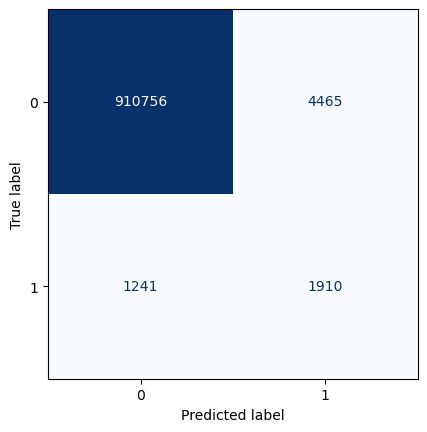

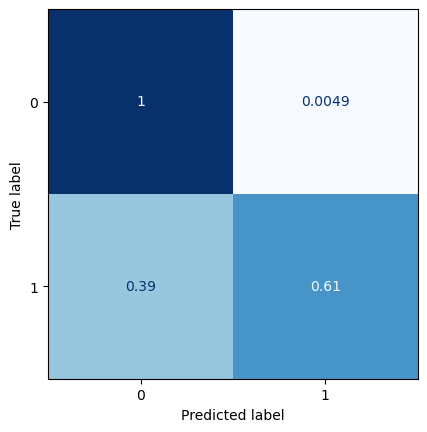

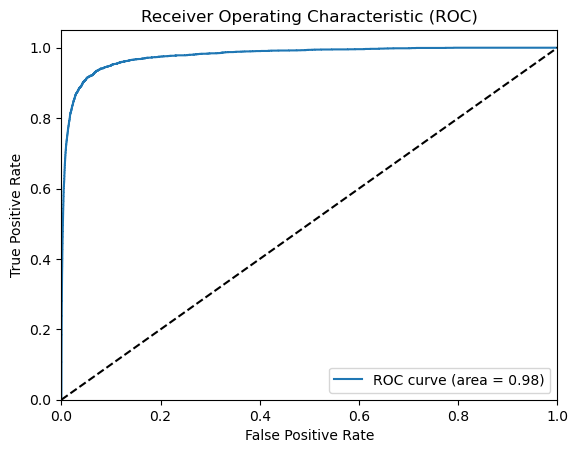

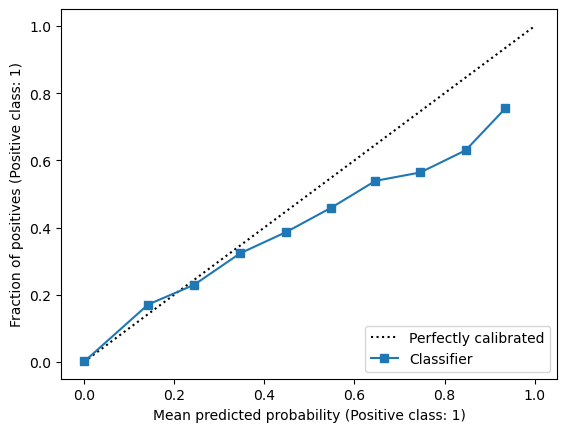

In [14]:
test_img_std = test_img_std
y_test_img = y_test_img

t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)



## 10var-twodaylag


In [67]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 10)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 15, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_14 (UpSamplin  (None, 14, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 14, 30, 1)         73        
                                                                 
 cropping2d_14 (Cropping2D)  (None, 13, 29, 1)       

In [68]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0359 - val_loss: 0.0130
Epoch 2/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0135 - val_loss: 0.0104
Epoch 3/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0118 - val_loss: 0.0098
Epoch 4/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0110 - val_loss: 0.0095
Epoch 5/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0106 - val_loss: 0.0091
Epoch 6/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0103 - val_loss: 0.0086
Epoch 7/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0100 - val_loss: 0.0084
Epoch 8/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0099 - val_loss: 0.0084
Epoch 9/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0097 - val_loss: 0.0081
Epoch 10/100
354/354 [==============================] - 2s 5ms/step - loss: 0.0096 - val_lo

77/77 [==============================] - 0s 2ms/step
0.0034310715047932644
0.002079053919030106


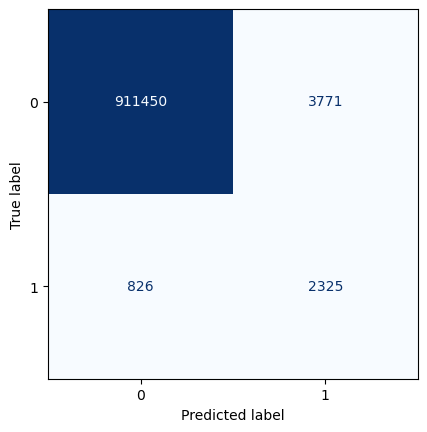

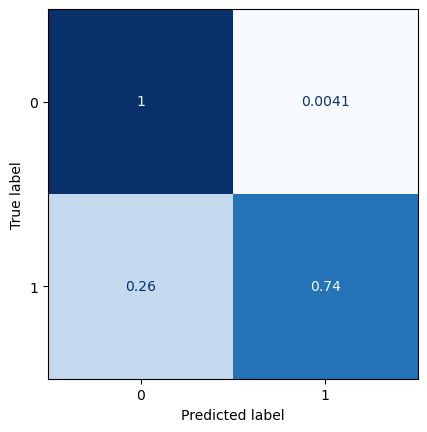

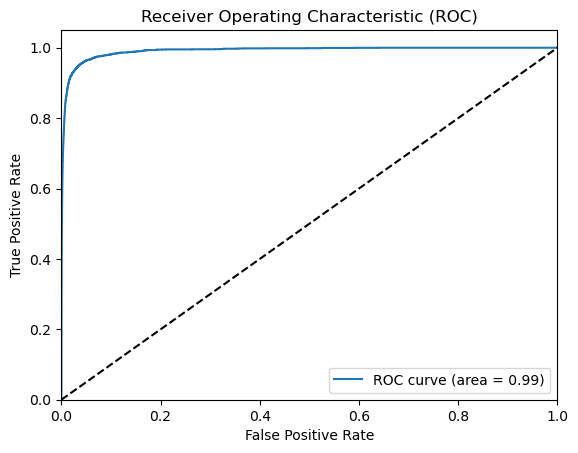

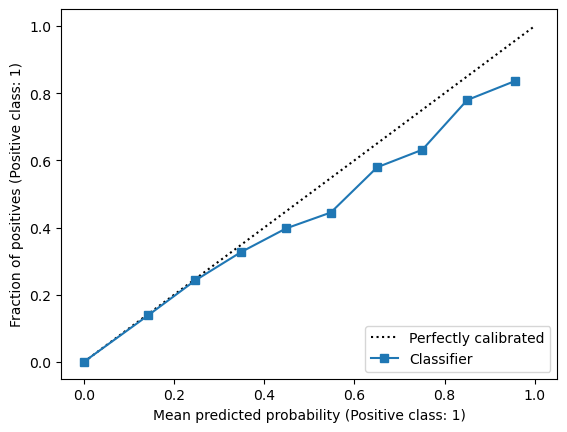

In [15]:
test_img_std = test_img_std
y_test_img = y_test_img

t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)



77/77 [==============================] - 0s 2ms/step


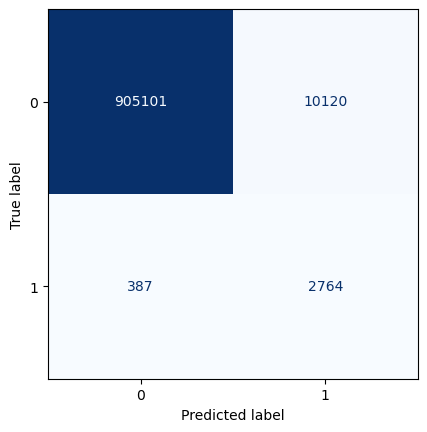

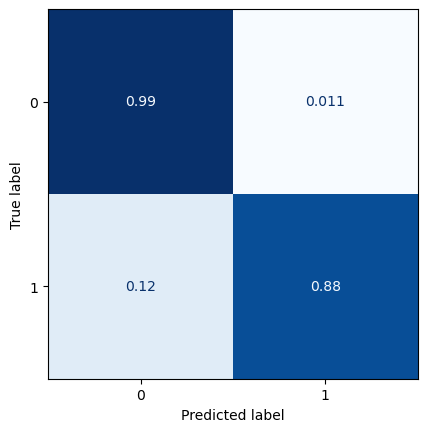

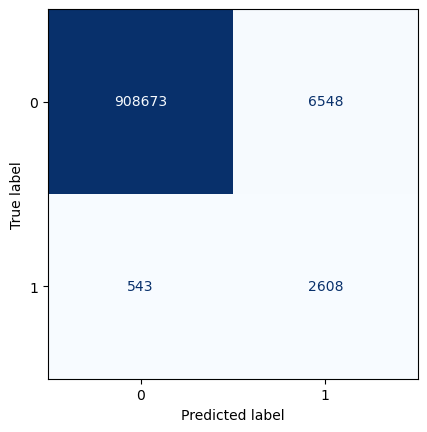

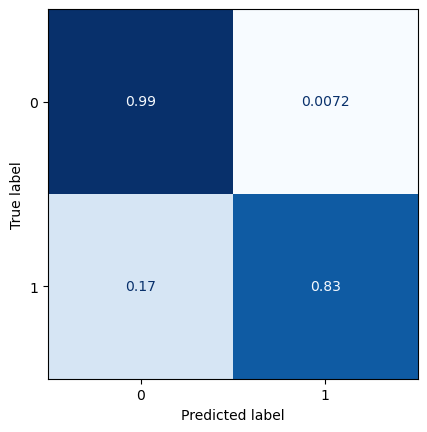

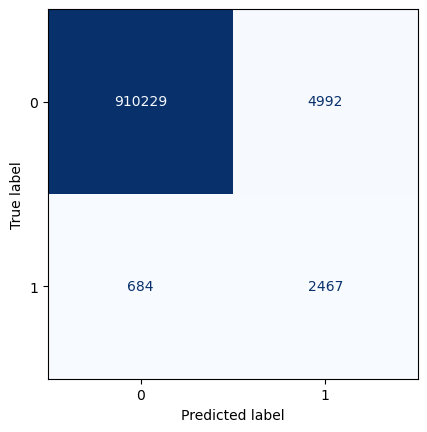

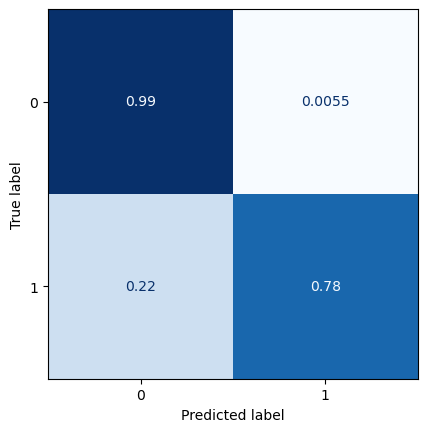

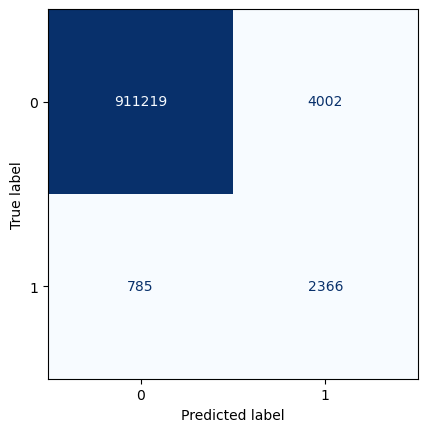

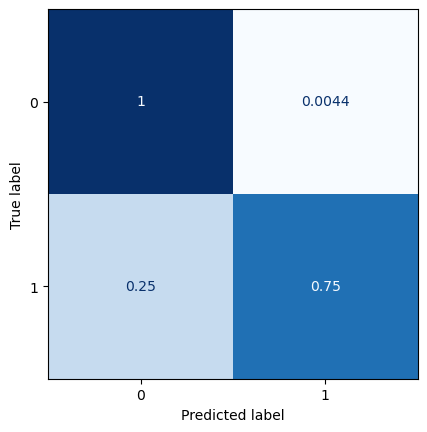

In [69]:
t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

## lags

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 30, 1)         73        
                                                                 
 cropping2d_1 (Cropping2D)   (None, 13, 29, 1)        

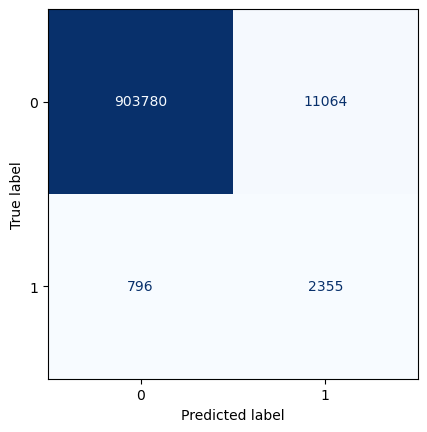

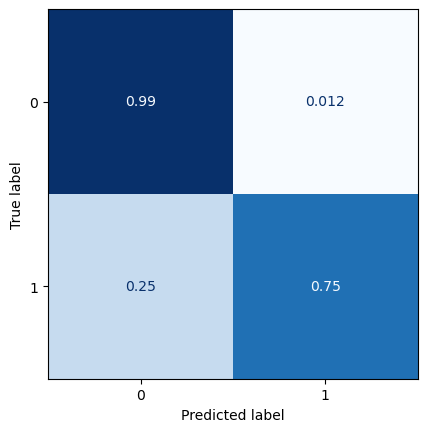

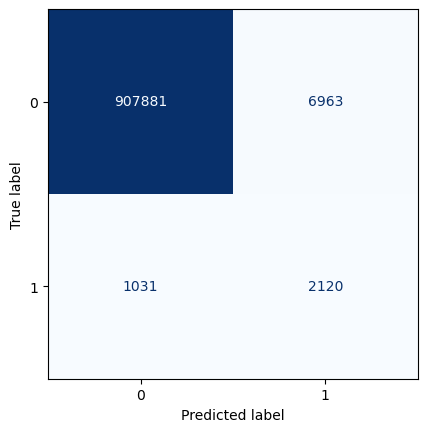

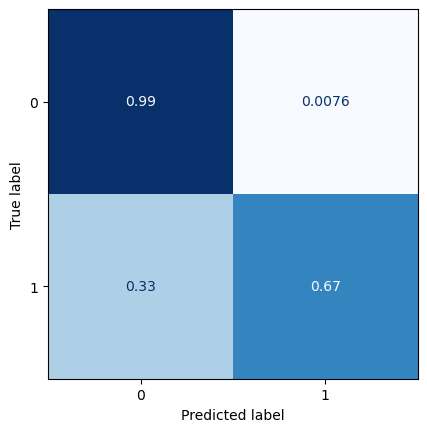

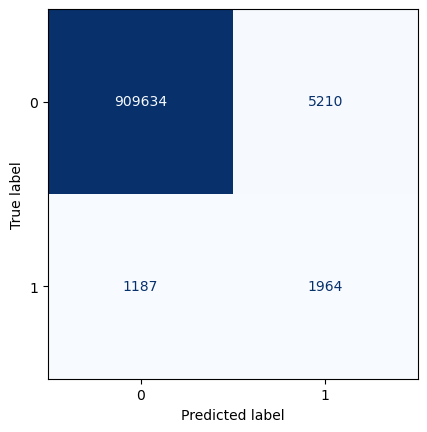

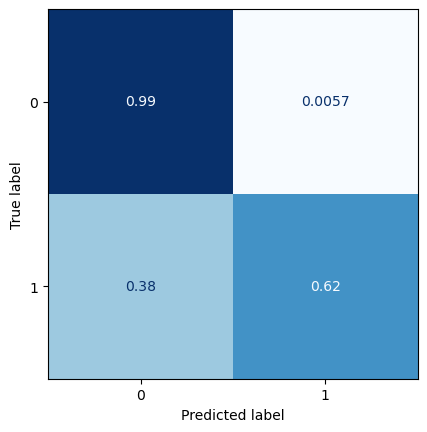

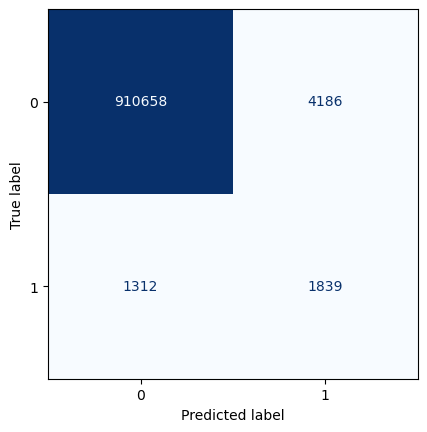

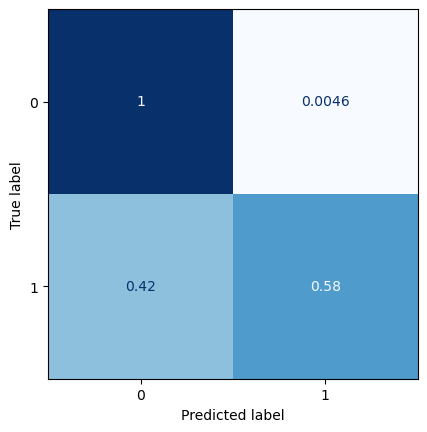

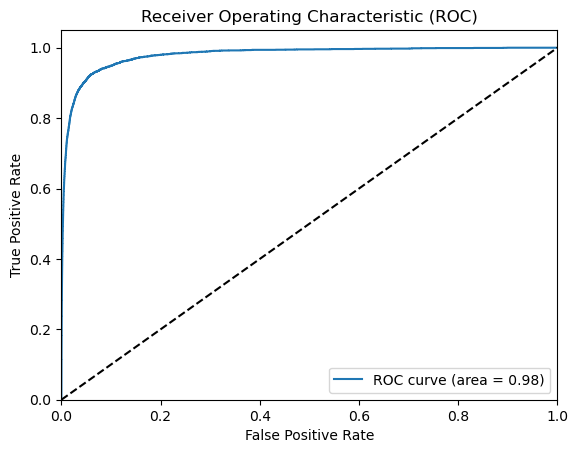

All zeros Brier score: 0.00343248056906628
Model Brier score: 0.0026391859358234856
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 30, 1)         73        
                                    

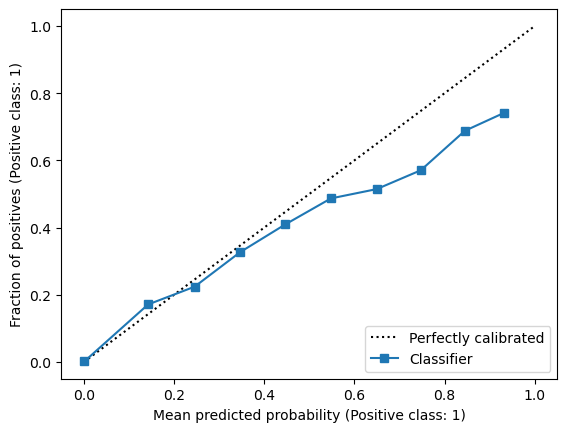

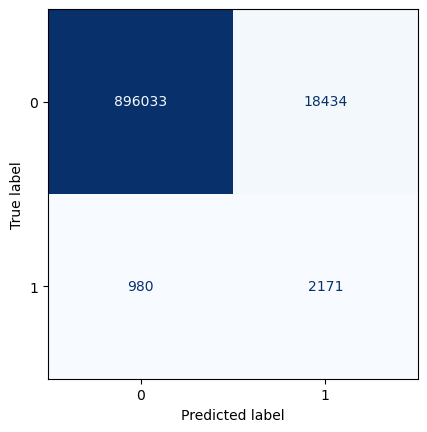

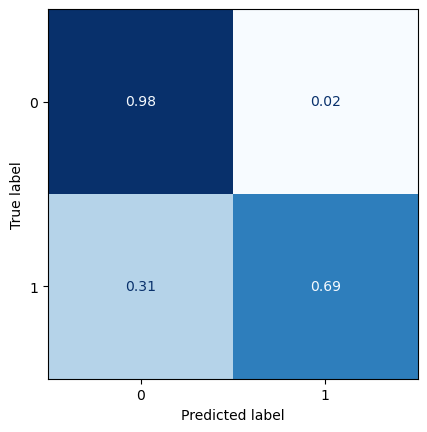

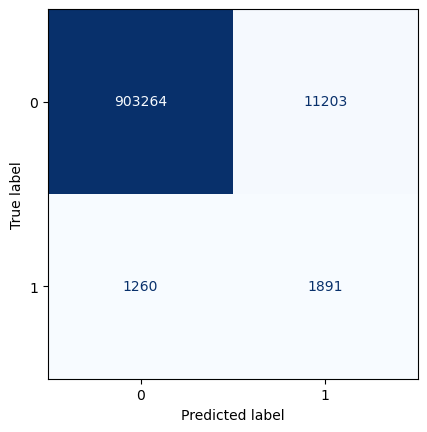

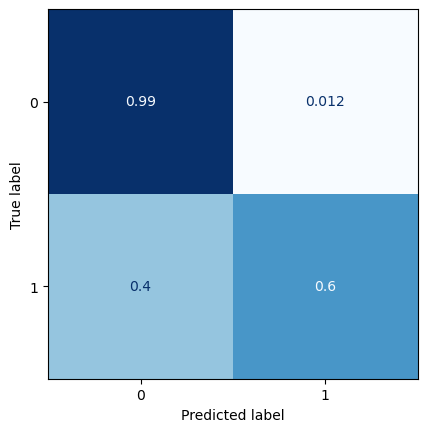

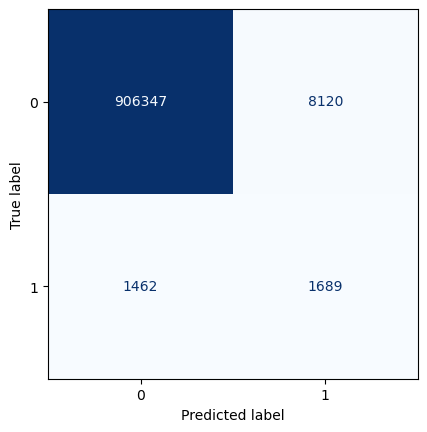

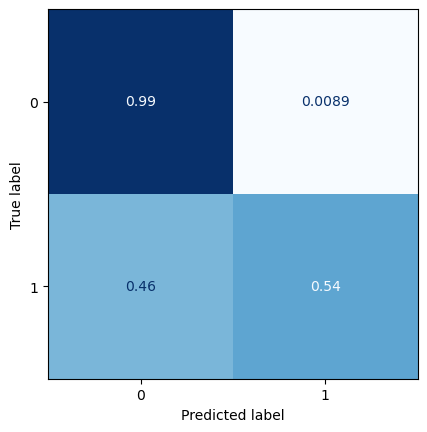

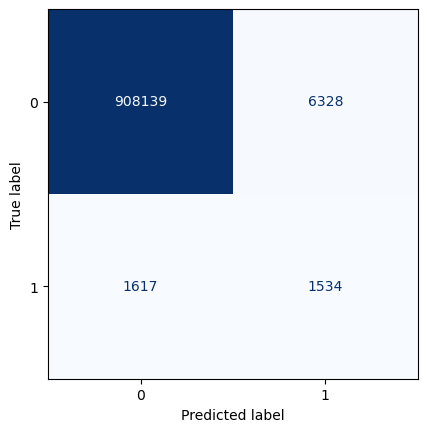

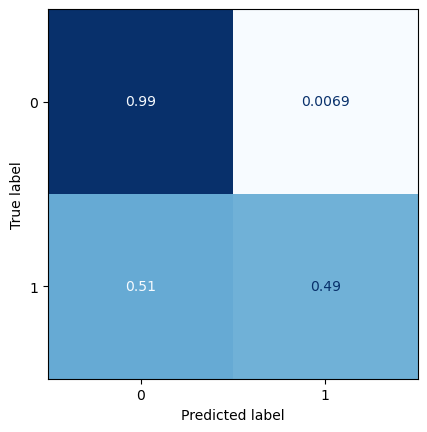

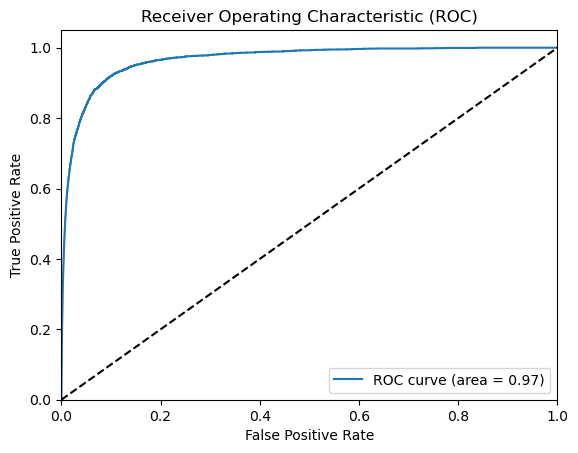

All zeros Brier score: 0.0034338907911571044
Model Brier score: 0.0030663785215360286
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_3 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 30, 1)         73        
                                  

Epoch 66: early stopping
77/77 [==============================] - 0s 2ms/step


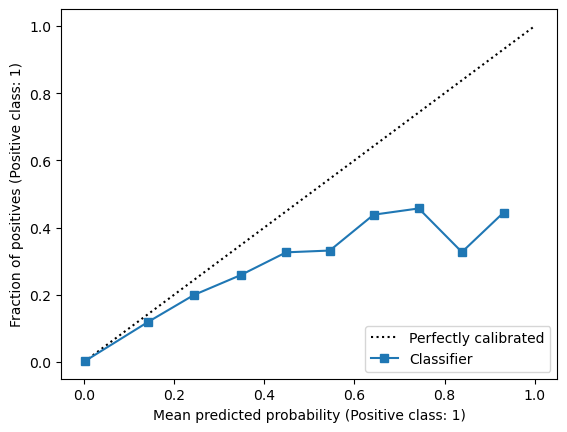

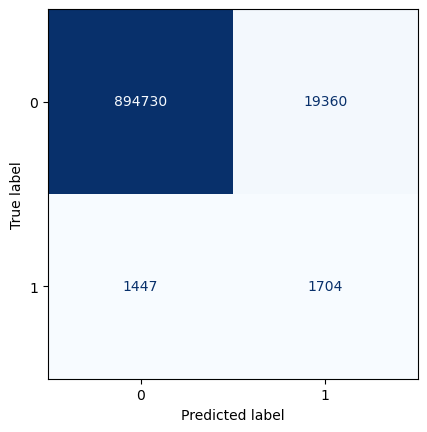

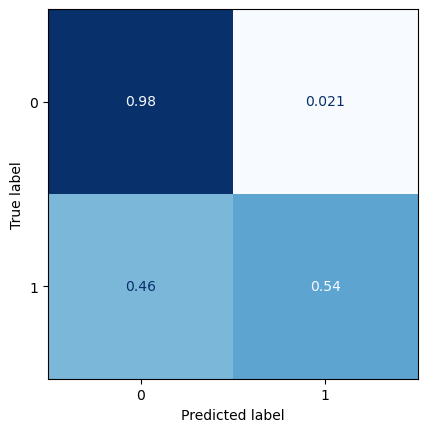

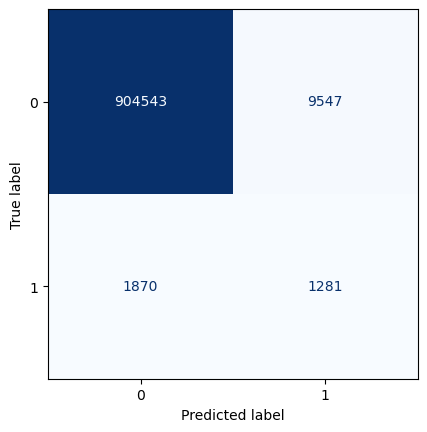

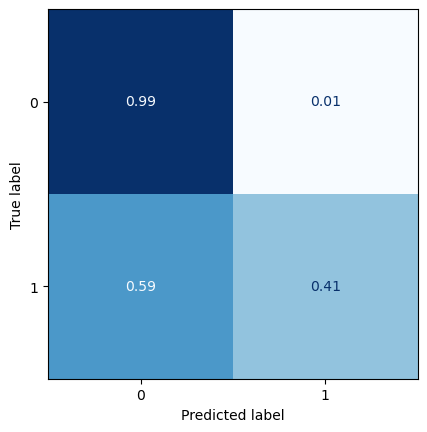

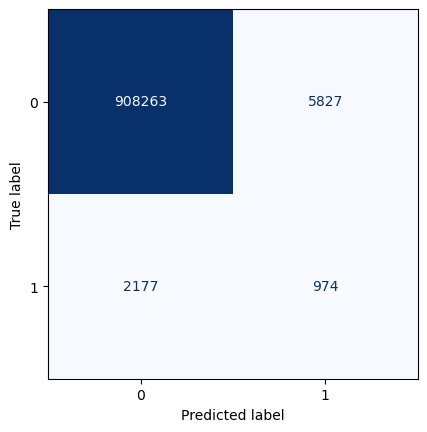

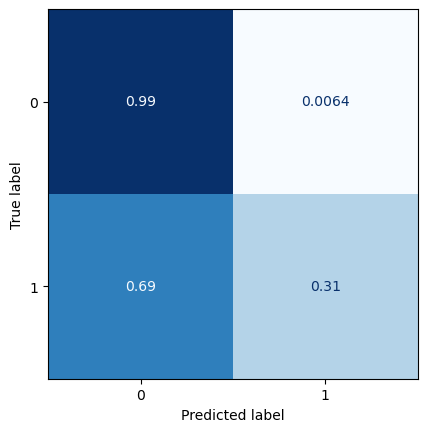

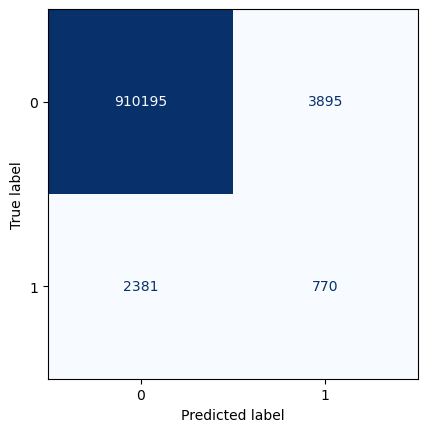

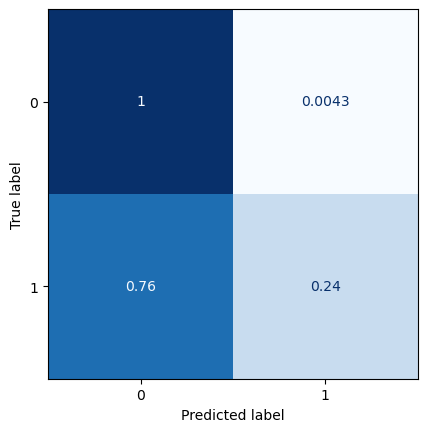

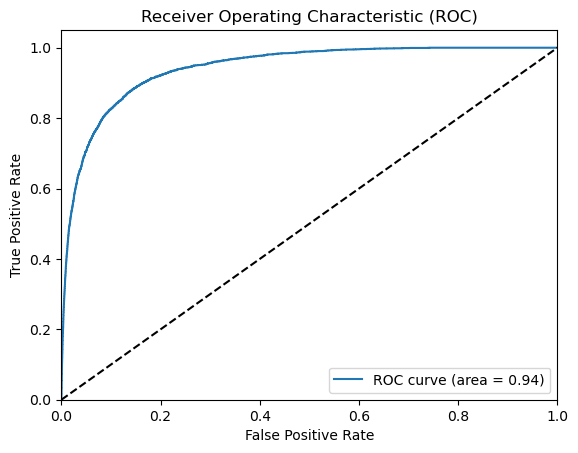

All zeros Brier score: 0.0034353021724933797
Model Brier score: 0.003222422462785928
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_4 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 30, 1)         73        
                                   

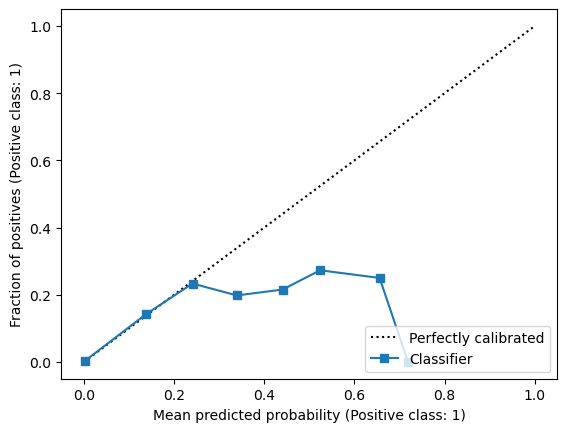

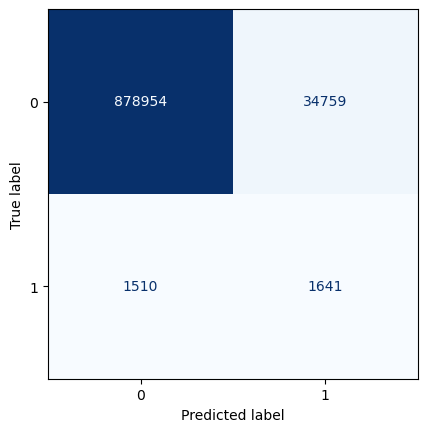

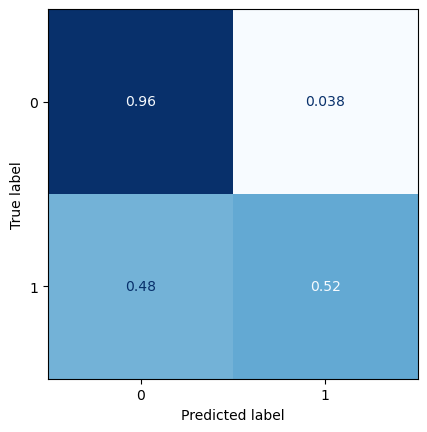

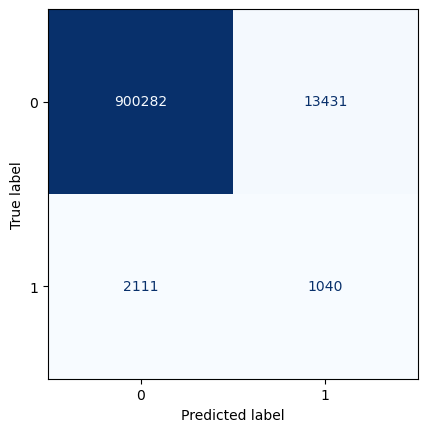

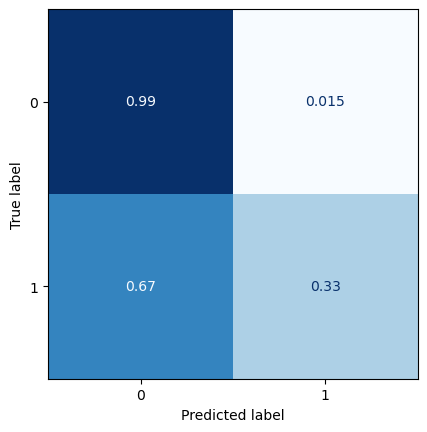

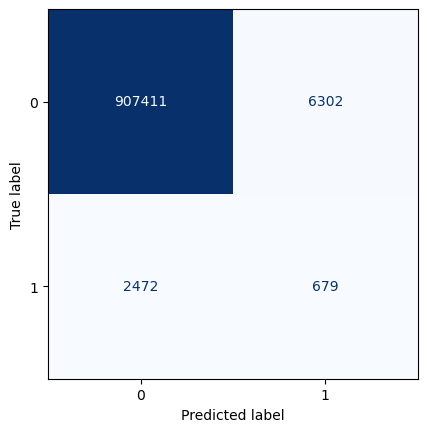

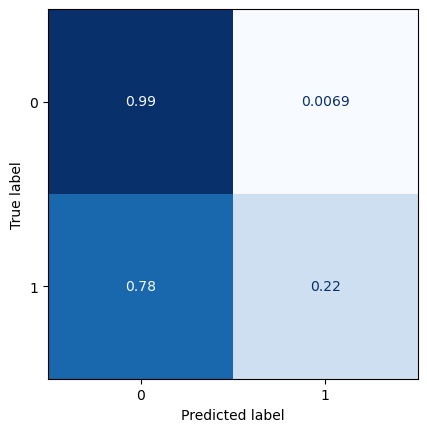

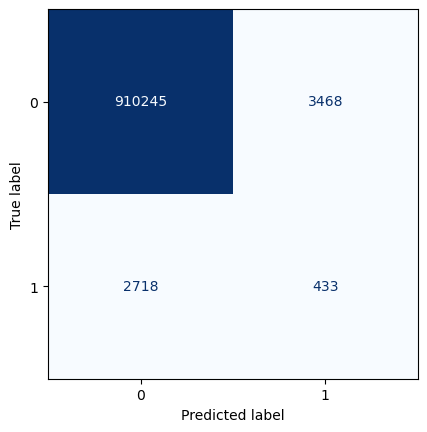

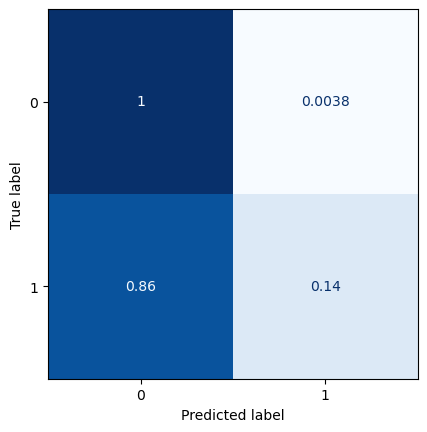

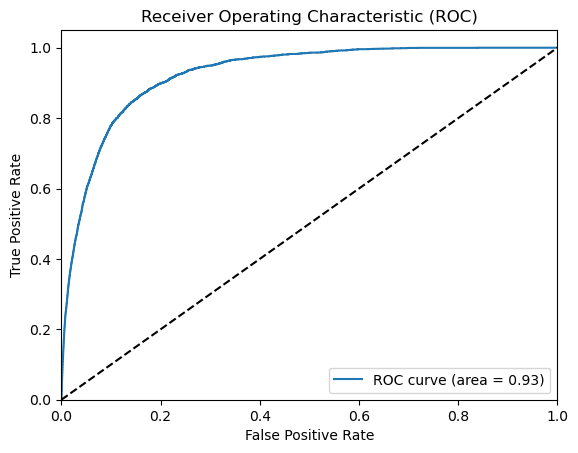

All zeros Brier score: 0.0034367147145050957
Model Brier score: 0.0033244731535779994
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_5 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 30, 1)         73        
                                  

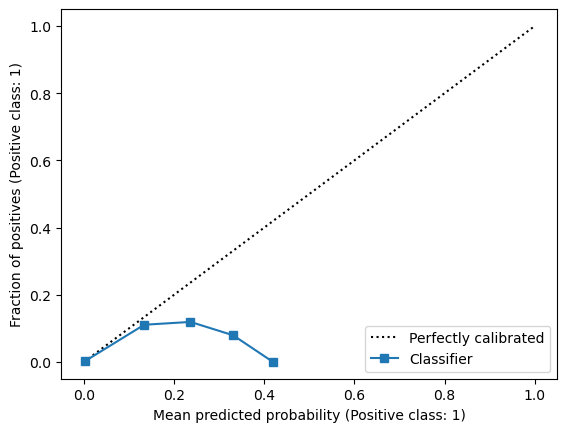

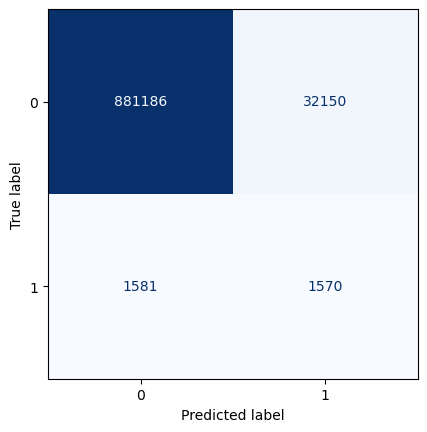

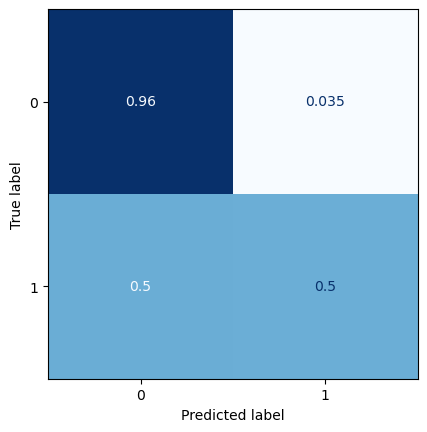

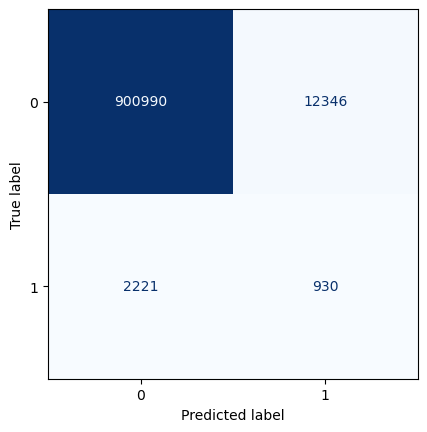

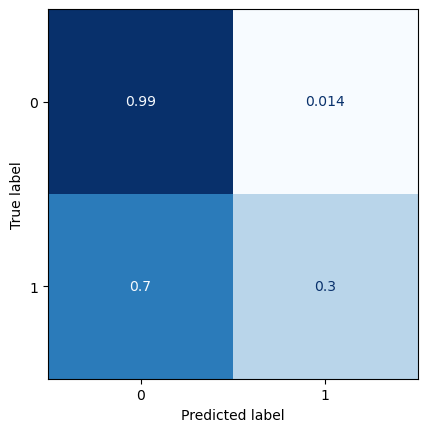

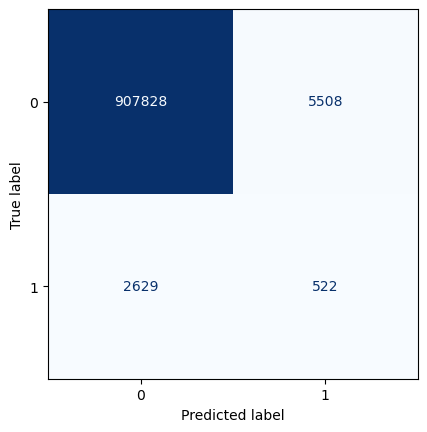

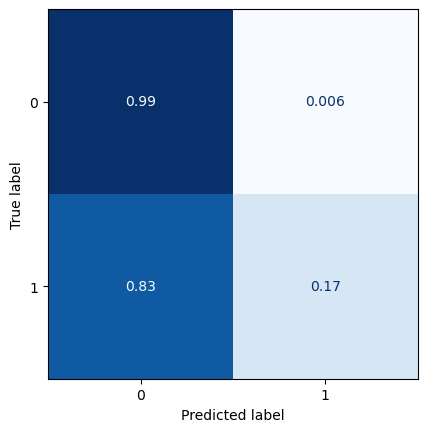

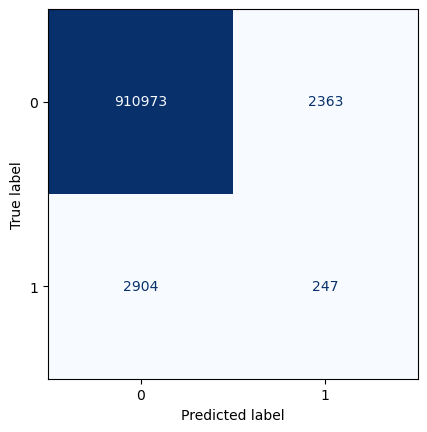

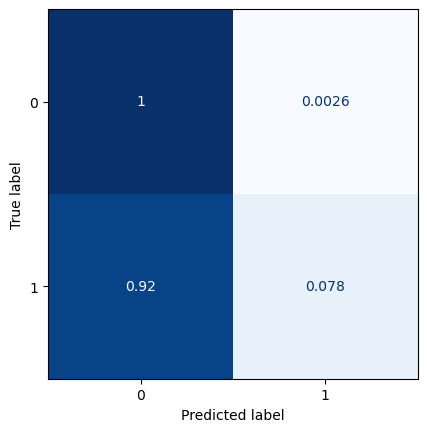

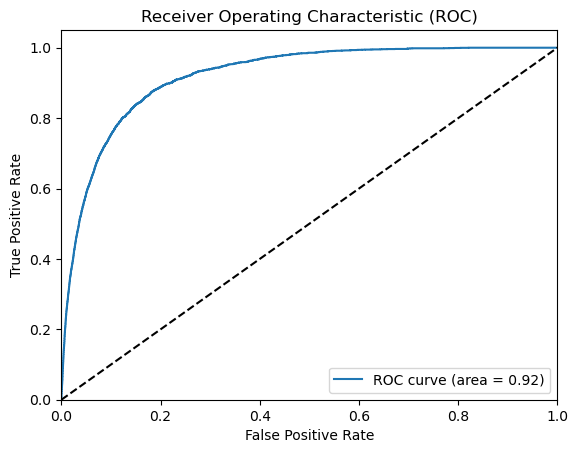

All zeros Brier score: 0.003438128418624596
Model Brier score: 0.0033271333018915312
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_6 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 30, 1)         73        
                                   

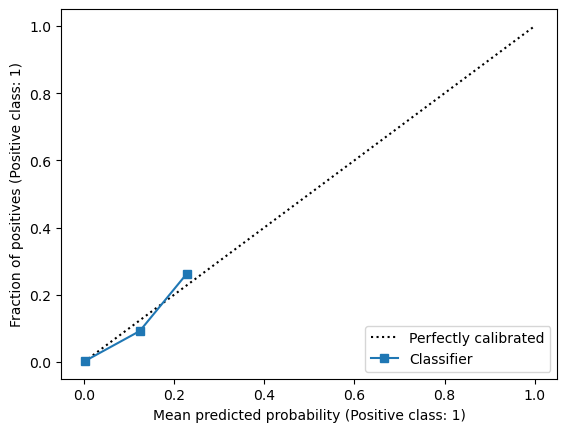

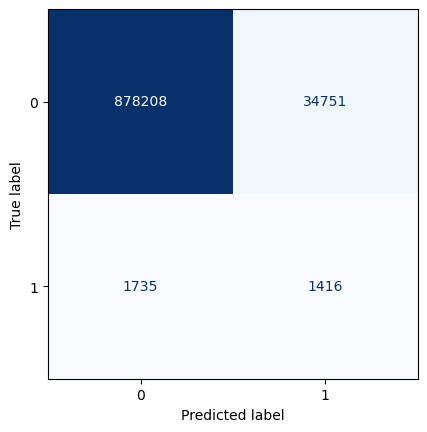

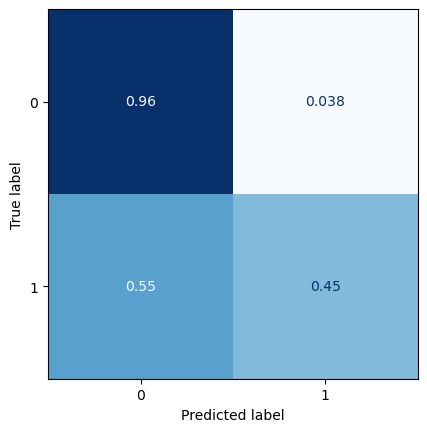

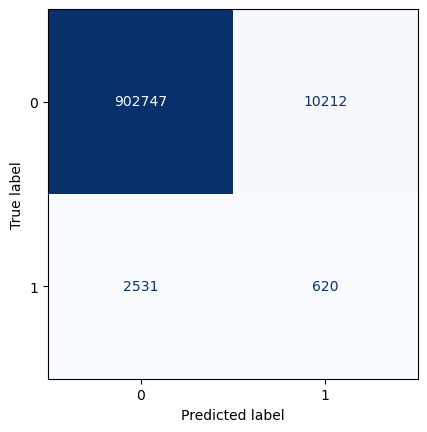

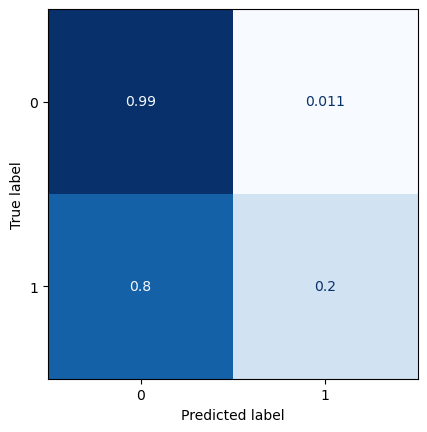

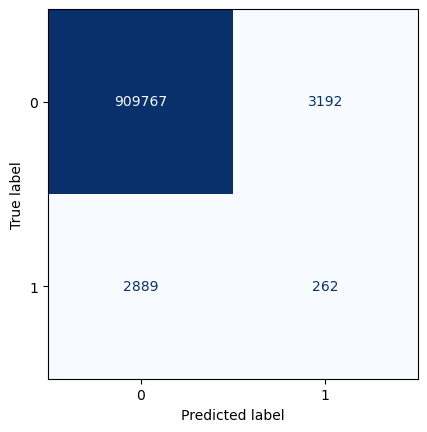

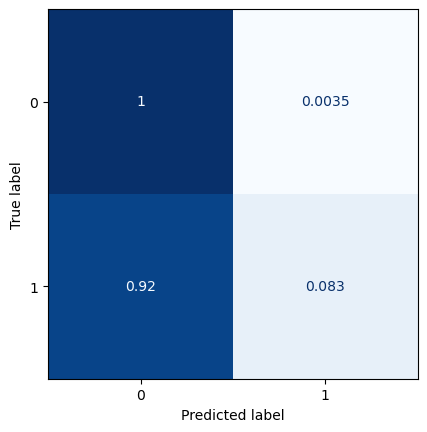

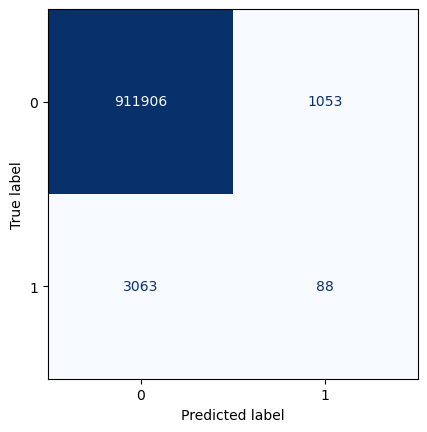

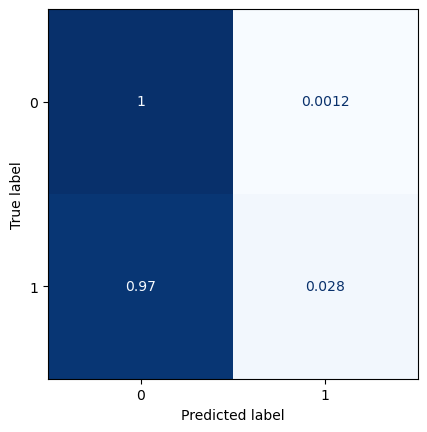

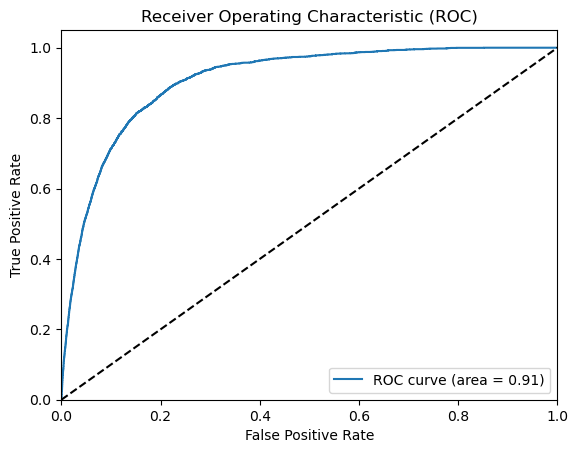

All zeros Brier score: 0.0034395432862865814
Model Brier score: 0.003358677086605128
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_7 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 30, 1)         73        
                                   

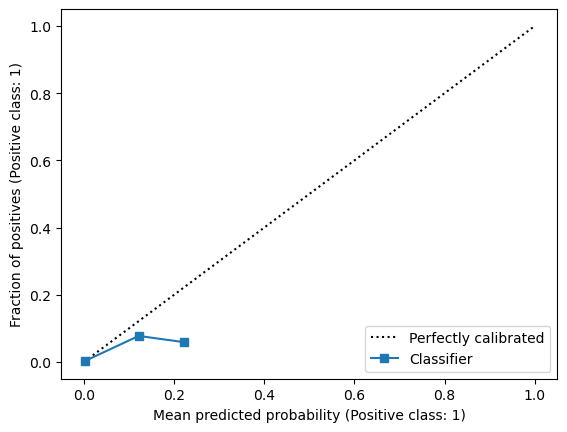

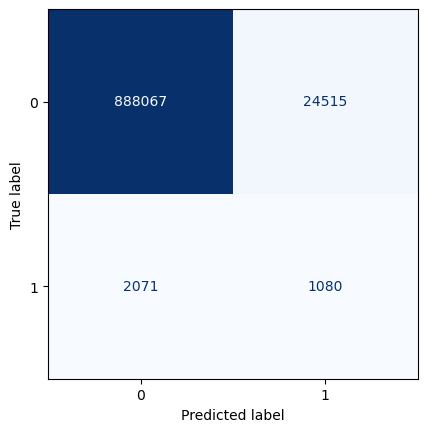

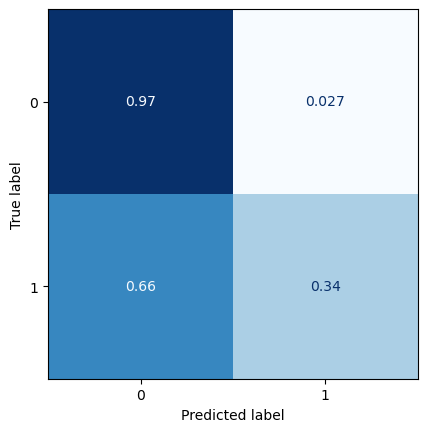

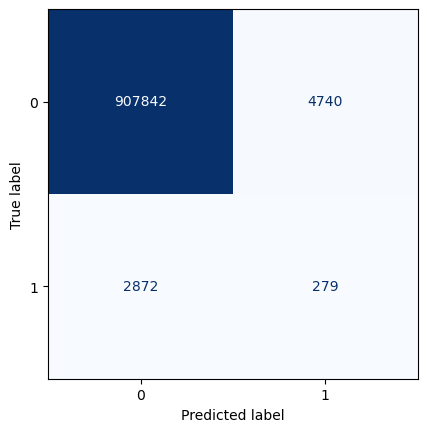

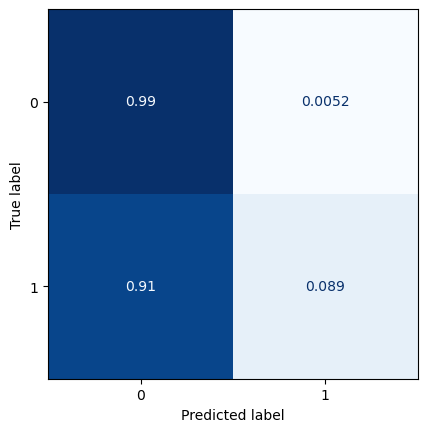

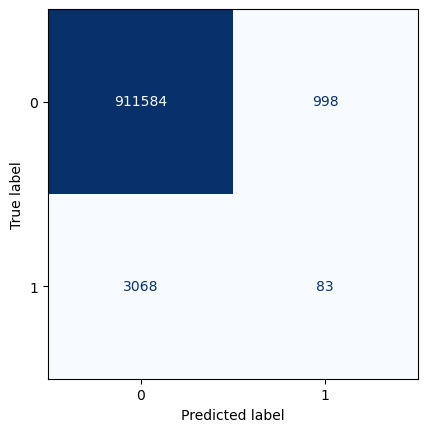

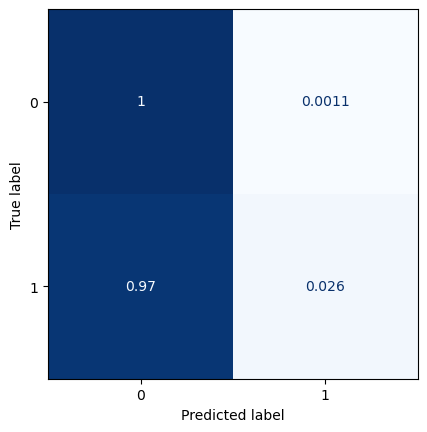

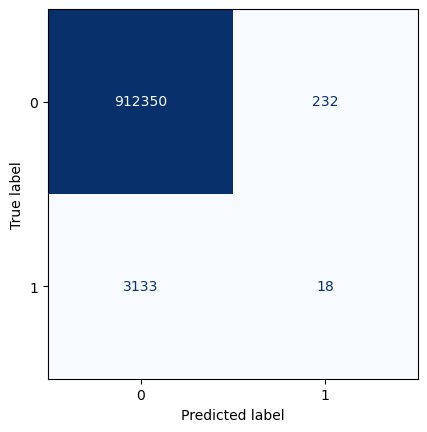

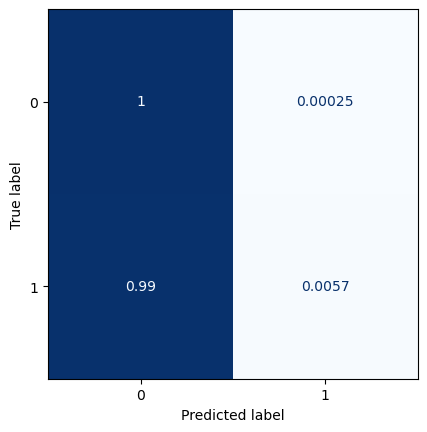

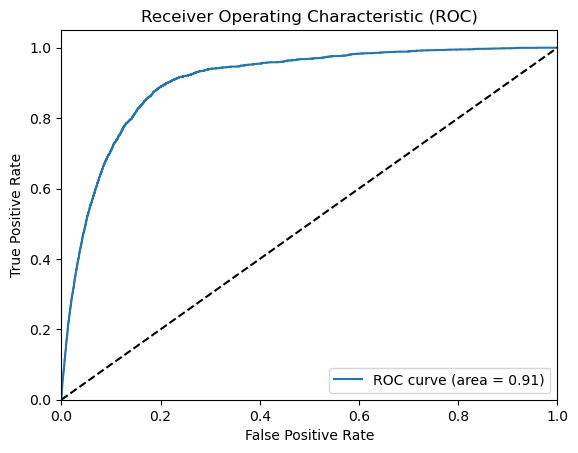

All zeros Brier score: 0.0034409593189281156
Model Brier score: 0.0033622345446745246
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_8 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 30, 1)         73        
                                  

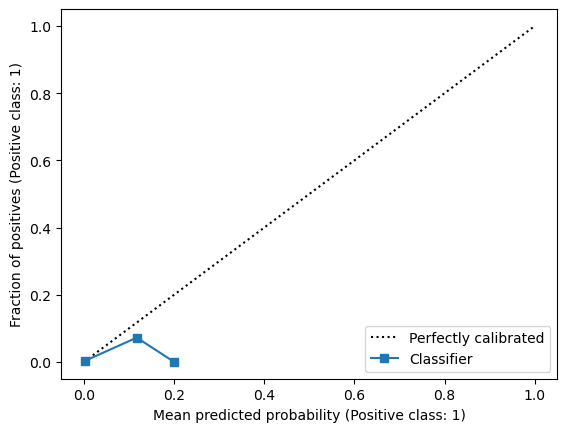

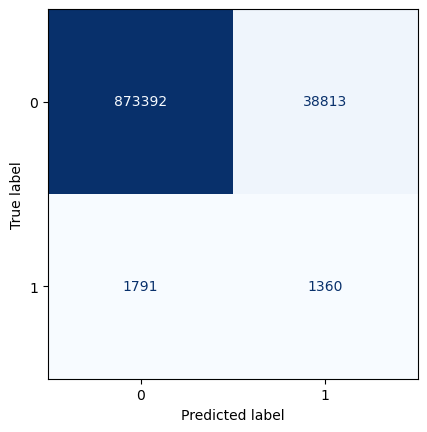

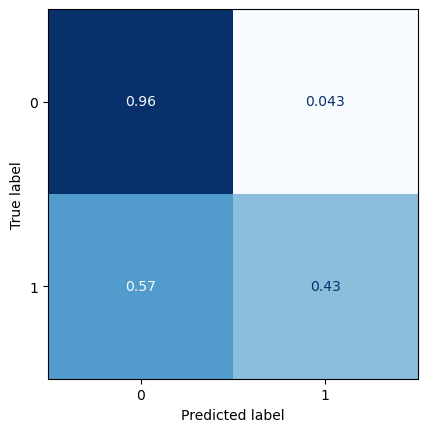

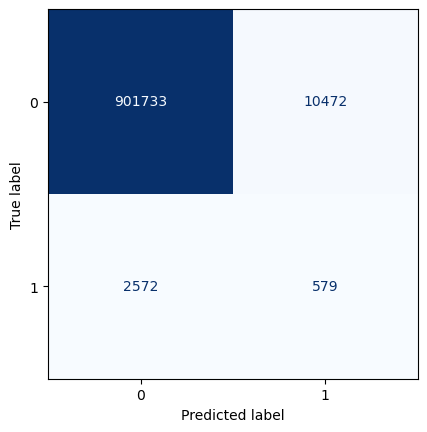

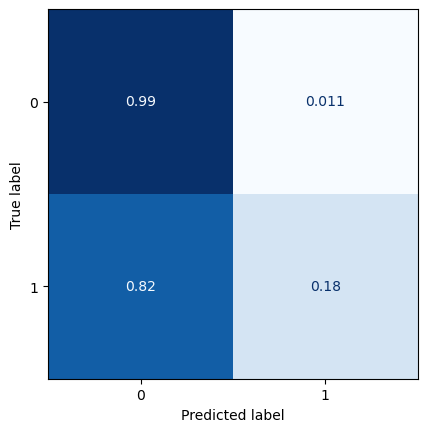

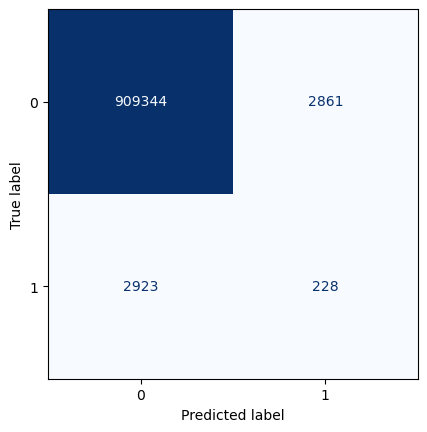

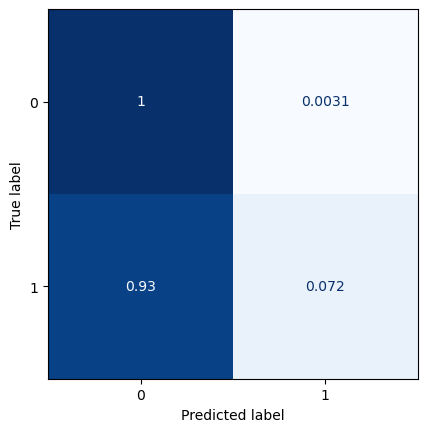

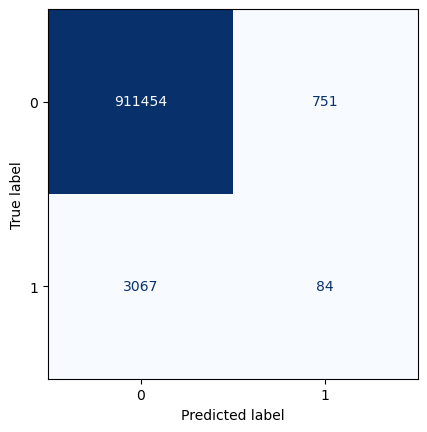

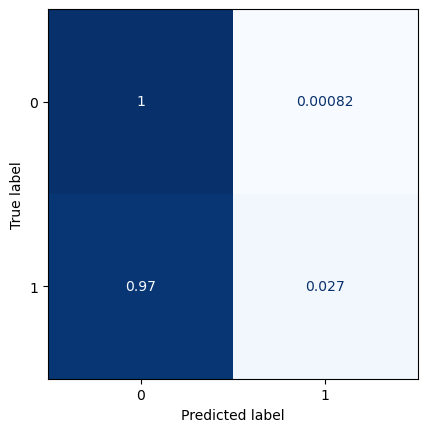

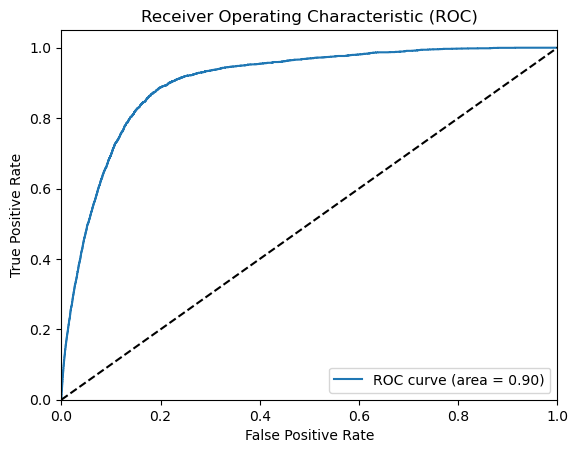

All zeros Brier score: 0.0034423765179886294
Model Brier score: 0.0033690996610917733
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_28 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_9 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 30, 1)         73        
                                  

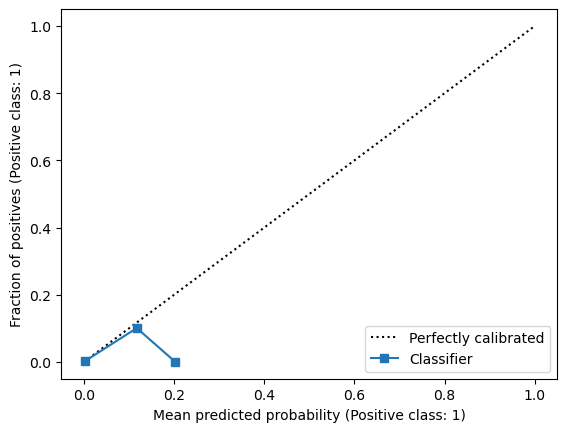

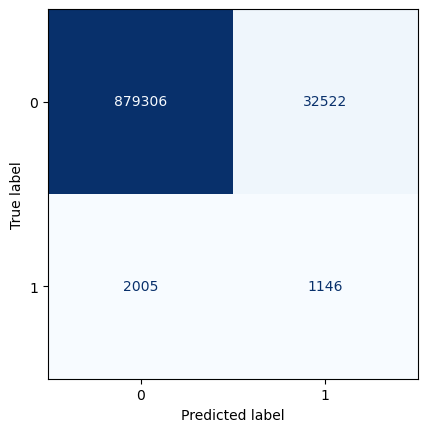

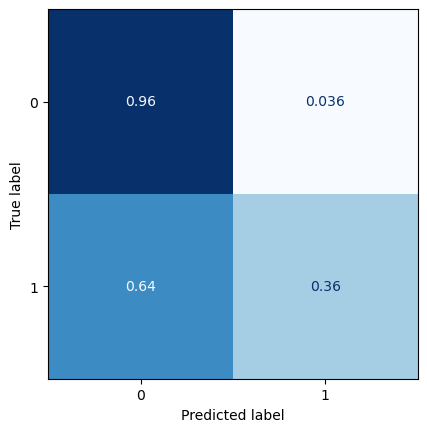

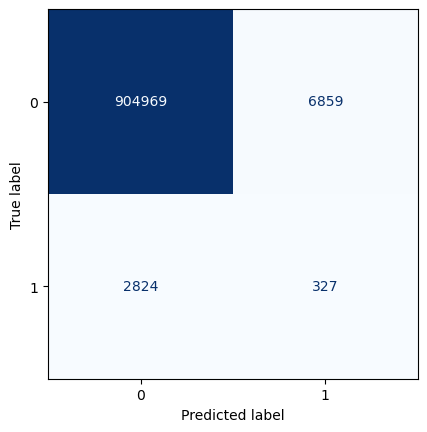

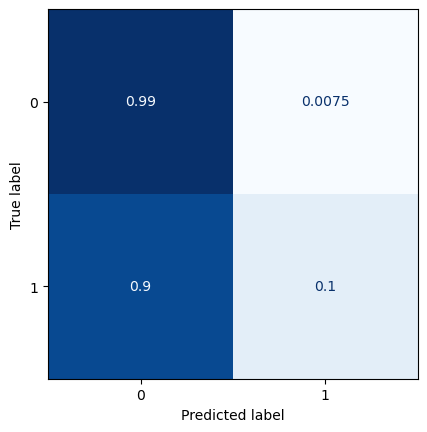

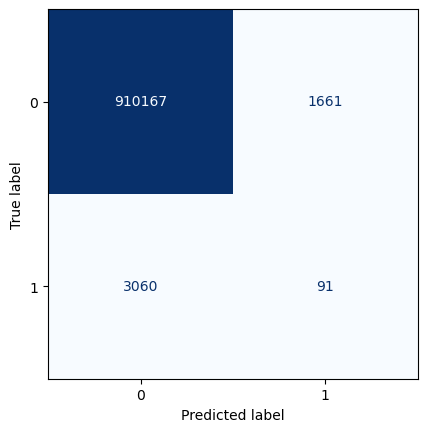

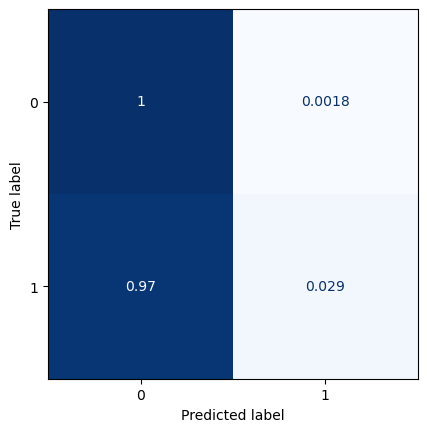

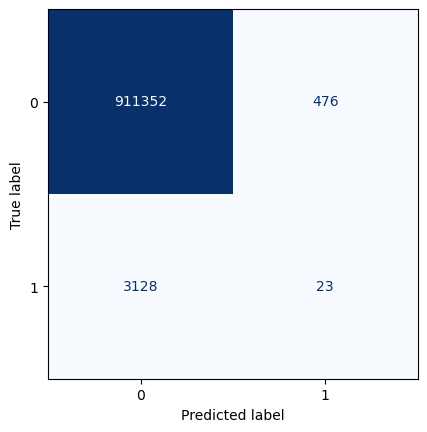

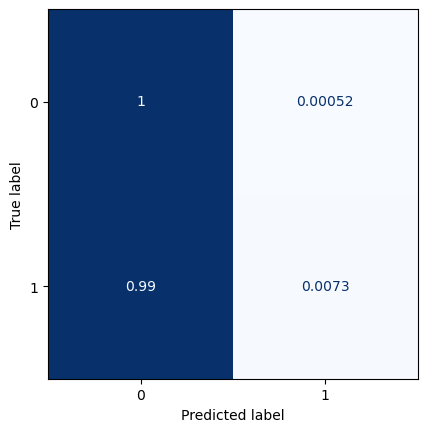

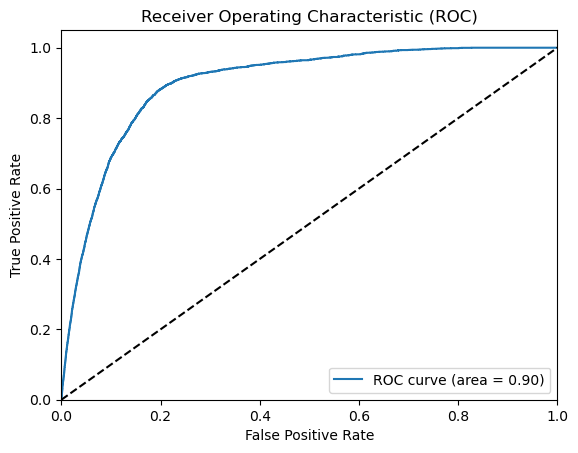

All zeros Brier score: 0.003443794884909927
Model Brier score: 0.0033805068153783817
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 15, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_10 (UpSamplin  (None, 14, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 30, 1)         73        
                                  

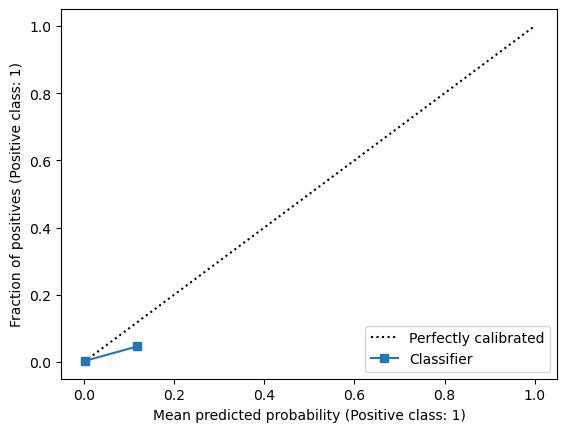

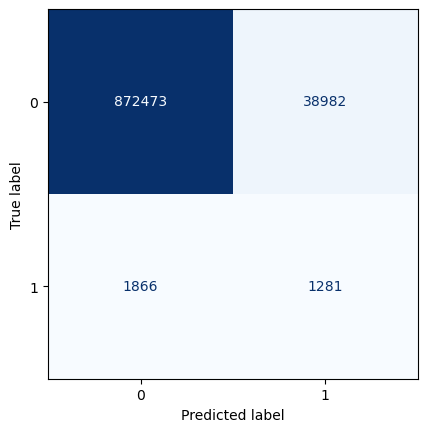

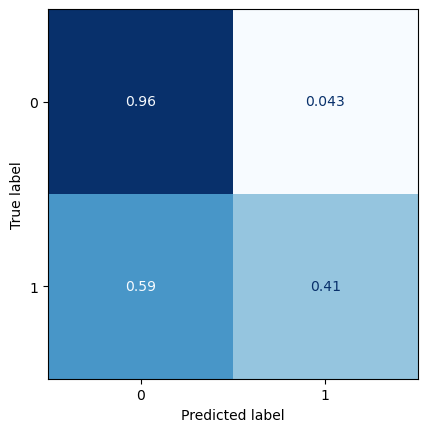

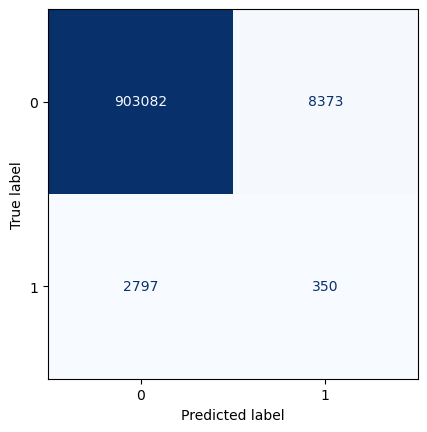

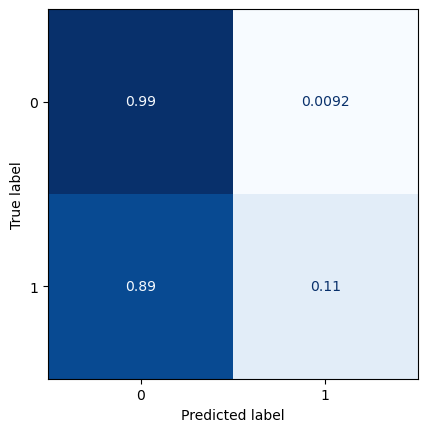

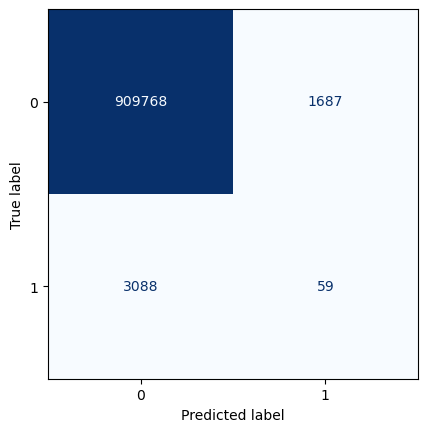

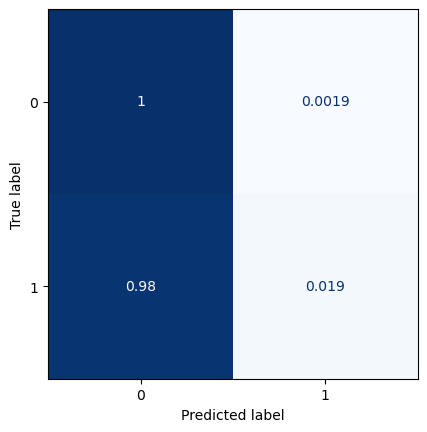

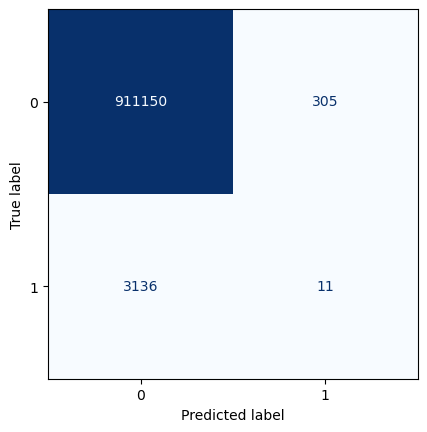

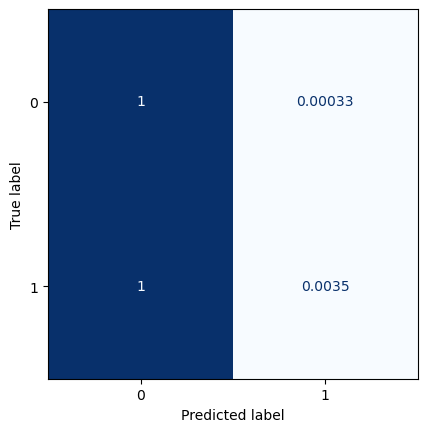

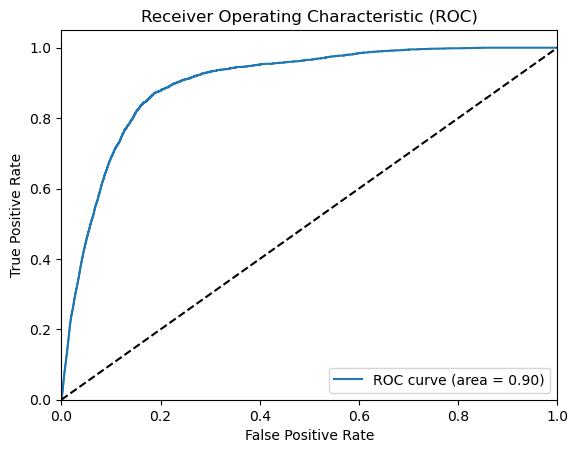

All zeros Brier score: 0.0034408409340893633
Model Brier score: 0.003382747572970304
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 15, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_11 (UpSamplin  (None, 14, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 14, 30, 1)         73        
                                  

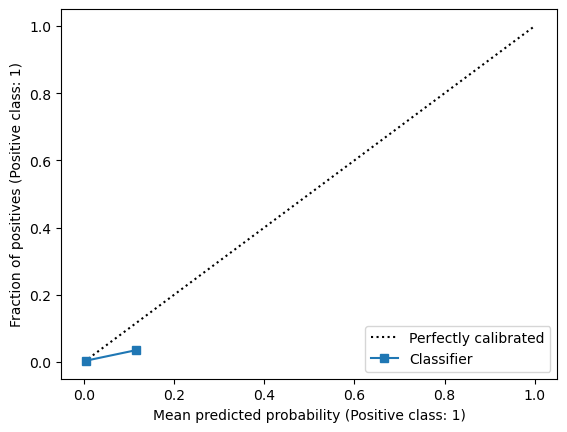

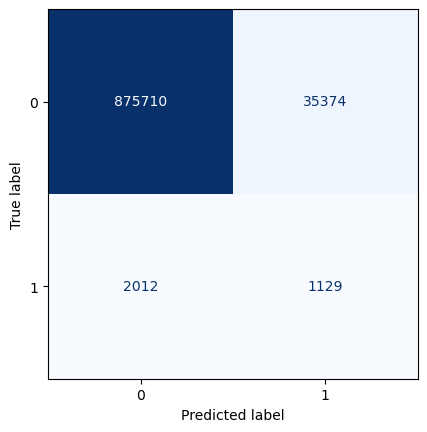

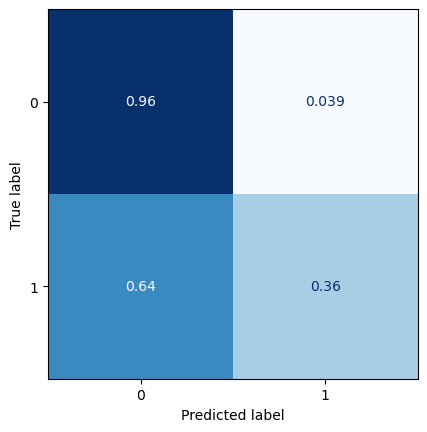

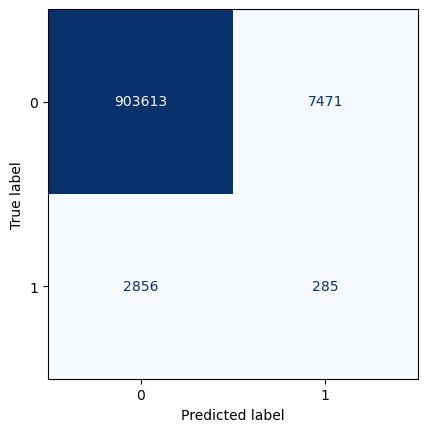

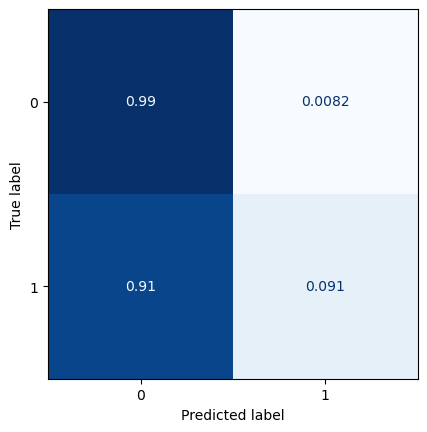

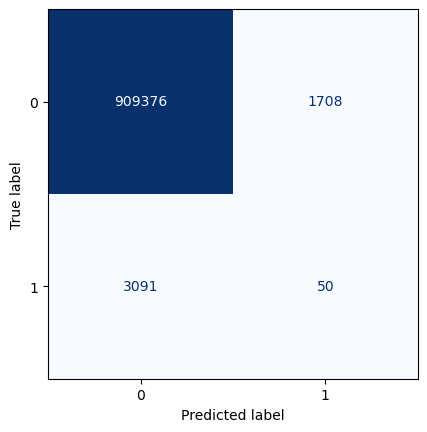

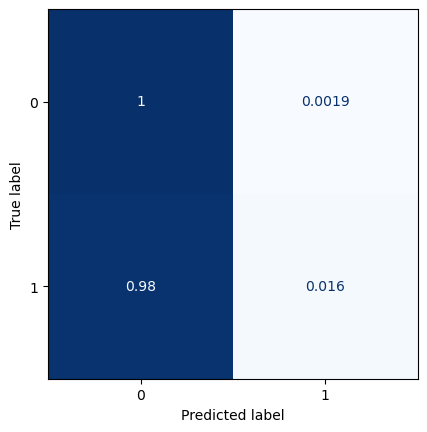

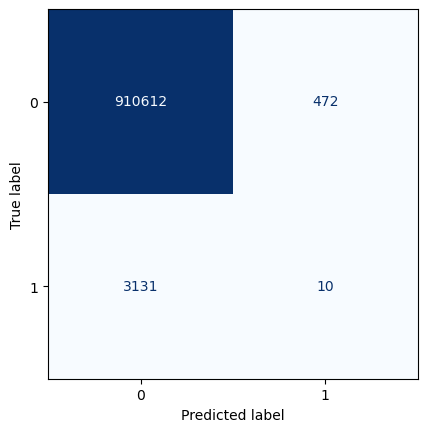

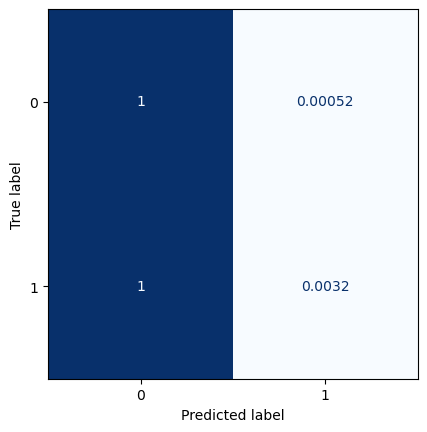

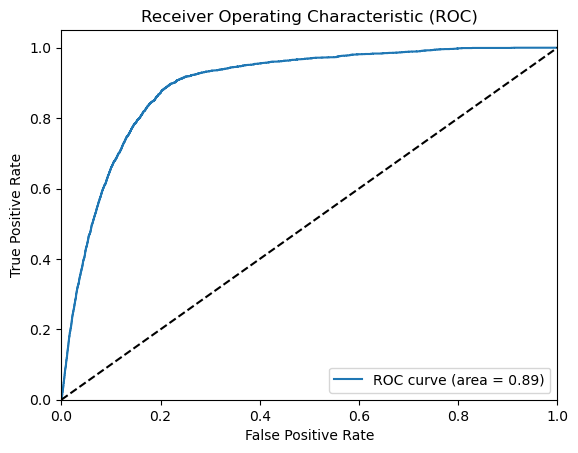

All zeros Brier score: 0.003435696901747382
Model Brier score: 0.003385743926547845
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 15, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_12 (UpSamplin  (None, 14, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 14, 30, 1)         73        
                                   

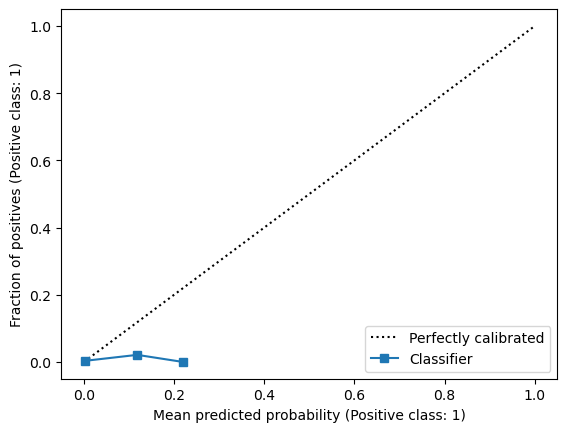

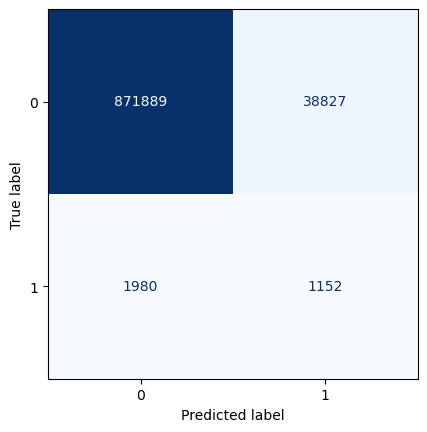

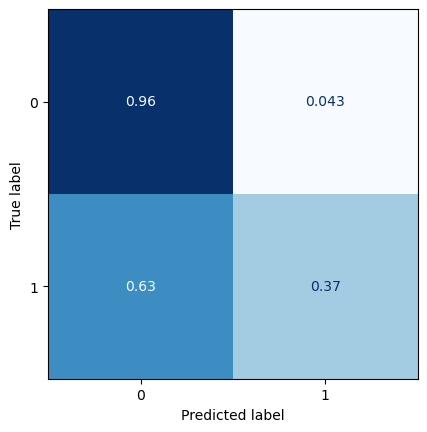

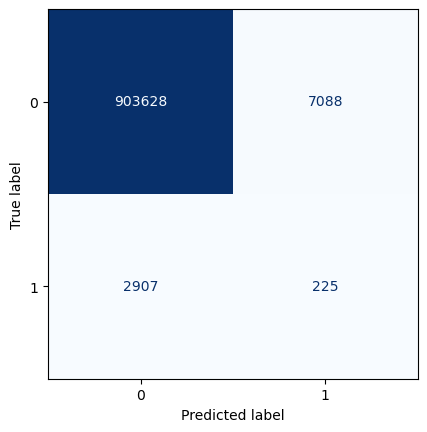

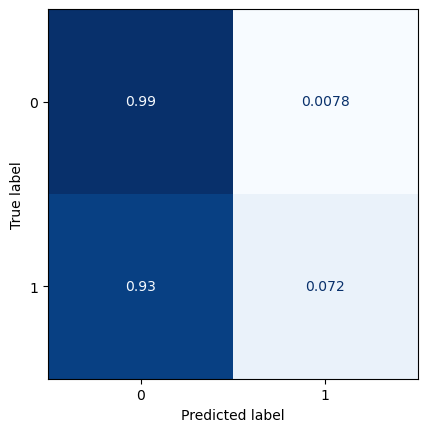

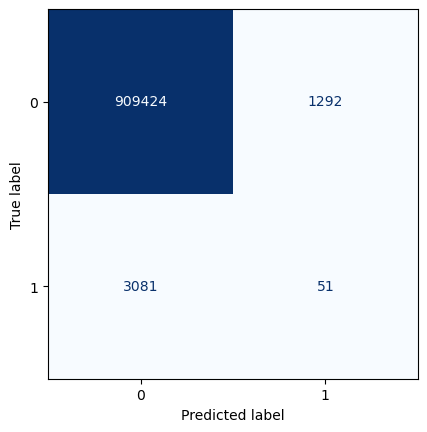

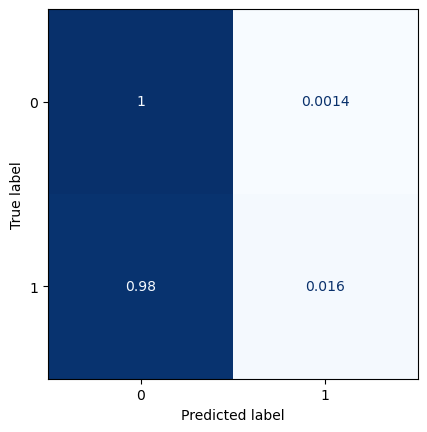

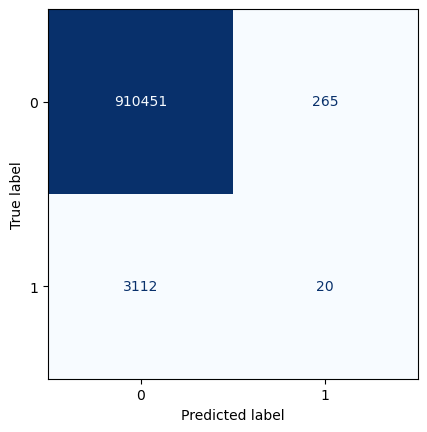

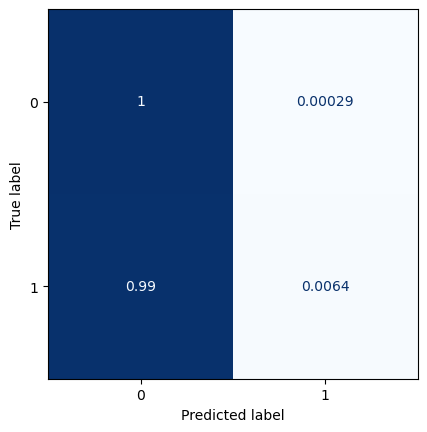

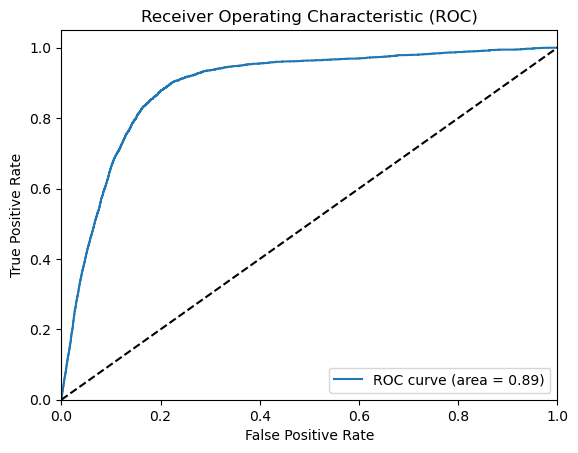

All zeros Brier score: 0.003427265803503427
Model Brier score: 0.0033792824185545508
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 15, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_13 (UpSamplin  (None, 14, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 14, 30, 1)         73        
                                  

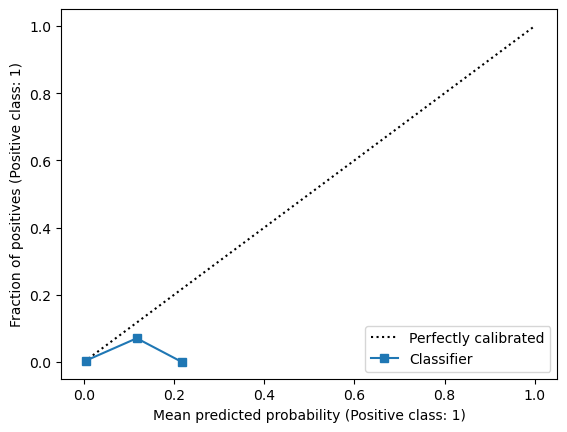

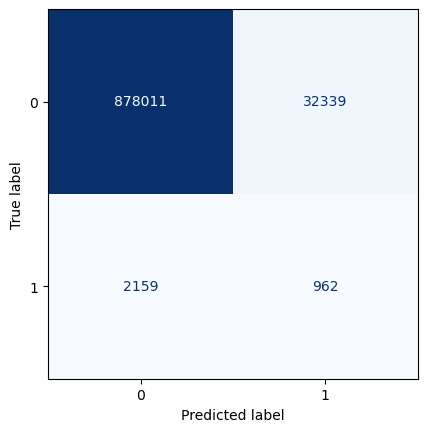

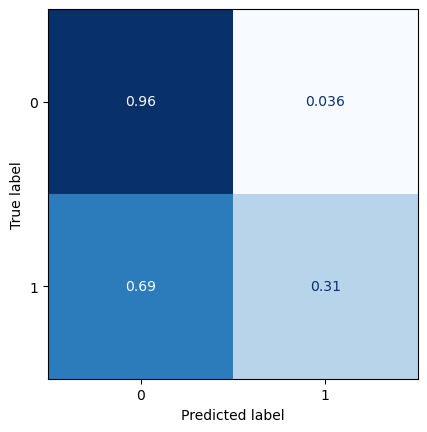

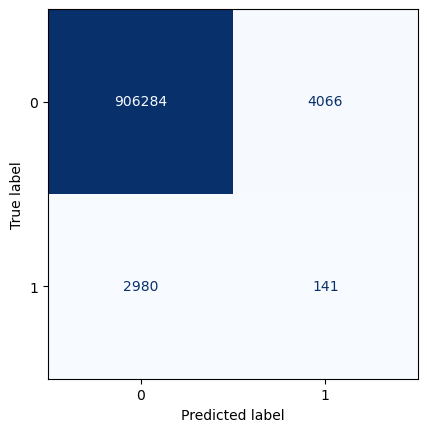

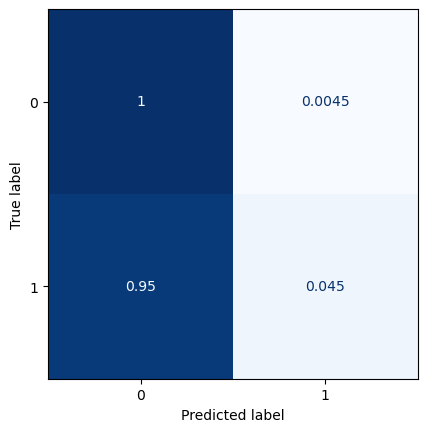

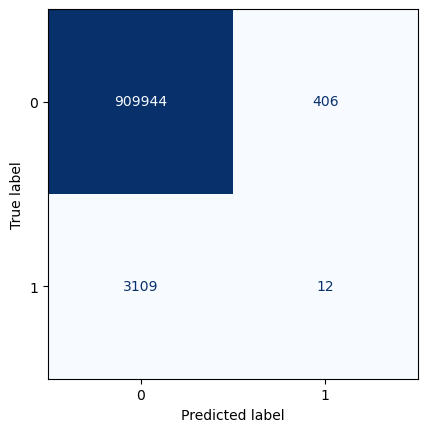

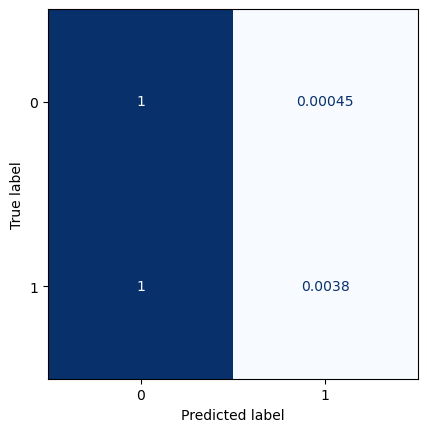

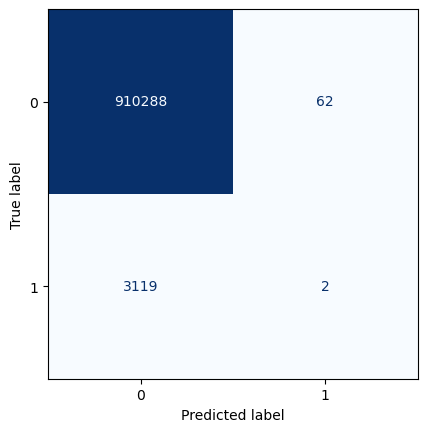

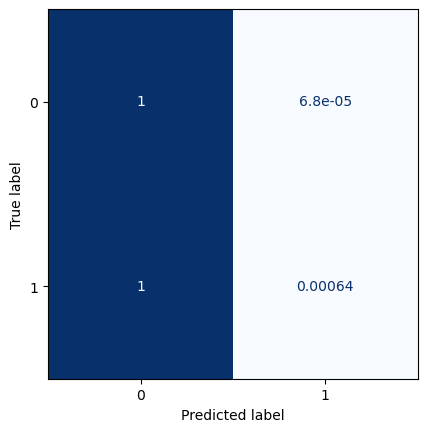

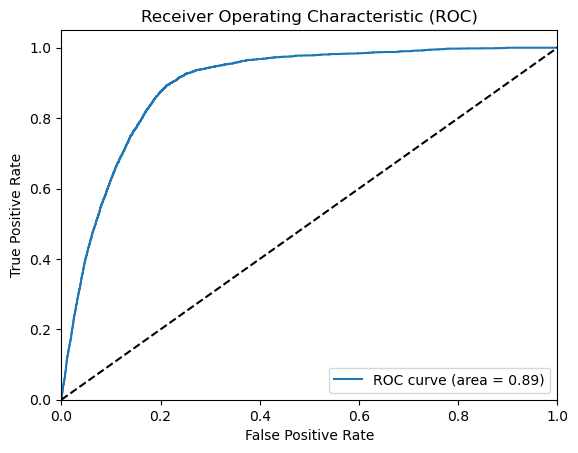

All zeros Brier score: 0.0034166382950307126
Model Brier score: 0.003365174956227591


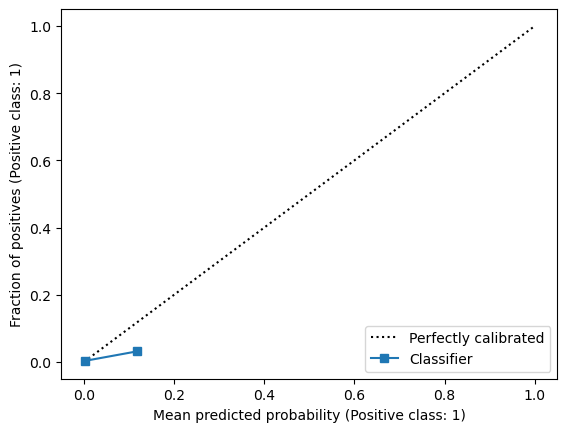

In [65]:
for lag in [1,2,3,4,5,6,7,8,9,10,11,12,13]:
    ### Model summary
    model = Sequential()
    model.add(layers.Input(shape=(13, 29, 10)))
    
    model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2,2)))
    
    model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities
    
    model.add(layers.Cropping2D(cropping=((0,1),(0,1))))
    
    model.summary()
    
    
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
            verbose=1, mode='auto', restore_best_weights=True)
    
    ### Model training
    model.fit(train_img_std[:-lag], y_train_img[lag:], validation_data=(val_img_std[:-lag],y_val_img[lag:]),
        callbacks=[monitor],epochs=100)
    
    ### Confusion matrices
    t = model.predict(test_img_std[:-lag])

    ranges = [0.025,0.05,0.075,0.1]
    
    for j in ranges:
        classes = []
        for i in t.reshape(-1,1):
            if i<=j: classes.append(0)
            else: classes.append(1)
    
        ConfusionMatrixDisplay(confusion_matrix(y_test_img[lag:].reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
        ConfusionMatrixDisplay(confusion_matrix(y_test_img[lag:].reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    
    ### ROC
    plot_roc(t.reshape(-1,1),y_test_img[lag:].reshape(-1,1))
    
    #z = np.zeros((lag,13,29,1))
    #tt = np.concatenate((t,z))
    #test['predictions_lag'+str(lag)] = tt.reshape(-1,1)
    #test.to_csv("test_with_newTarget_predictions.csv")
    
    ### calibration
    display = CalibrationDisplay.from_predictions(y_test_img[lag:].reshape(-1,1), t.reshape(-1,1), n_bins=10)
    print(f'All zeros Brier score: {brier_score_loss(y_test_img[lag:].reshape(-1,1), np.zeros(len(y_test_img[lag:].reshape(-1,1))))}')
    print(f'Model Brier score: {brier_score_loss(y_test_img[lag:].reshape(-1,1), t.reshape(-1,1))}')
    

# ResNet

In [3]:
import tensorflow as tf
INPUT_WIDTH = 32
INPUT_HEIGHT = 32
N_CHANNELS = 10
N_CLASSES = 1

model_arch = tf.keras.applications.ResNet50(
    input_shape=[INPUT_WIDTH, INPUT_HEIGHT, N_CHANNELS],
    #padding='valid',
    # Removing the fully-connected layer at the top of the network.
    #  Unless you have the same number of labels as the original architecture, 
    #  you should remove it.
    include_top=False,  
    input_tensor=None,
    #input_shape=None,
    pooling=None,
    # Using no pretrained weights (random initialization)
    weights=None)

# 2. Define the full architecture by adding a classification head.
#    For this example, I chose to flatten the results and use a single Dense layer.

model = tf.keras.Sequential()
model.add(model_arch)

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities



model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


/Users/3rfanian/opt/anaconda3/envs/SHAP/lib/python3.10/site-packages/keras/applications/resnet.py:135: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 10 input channels.
  input_shape = imagenet_utils.obtain_input_shape(
2023-05-10 10:31:25.706946: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23609664  
                                                                 
 conv2d (Conv2D)             (None, 1, 1, 8)           147464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 8)           584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 2, 2, 8)          0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 1)           7

In [117]:
#validation_data=(pad_imags(val_img_std),pad_imags(y_val_img))
model.fit(pad_imags(train_img_std), pad_imags(y_train_img) ,validation_data=(pad_imags(val_img_std),pad_imags(y_val_img)),
        callbacks=[monitor],epochs=1)

ValueError: Data cardinality is ambiguous:
  x sizes: 11323
  y sizes: 4268771
Make sure all arrays contain the same number of samples.

In [94]:
psd = pad_imags(train_img_std)
psd.shape

(11323, 32, 32, 10)

In [92]:
y_train_img.shape

(11323, 13, 29, 1)

In [ ]:
pad_imags(y_train_img)

In [98]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2.9.1
Num GPUs Available:  0


In [106]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 10)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=1)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_116 (Conv2D)         (None, 13, 29, 8)         728       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_117 (Conv2D)         (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 30, 8)        0         
 )                                                               
                                                                 
 conv2d_118 (Conv2D)         (None, 14, 30, 1)         73        
                                                                 
 cropping2d_1 (Cropping2D)   (None, 13, 29, 1)       

In [116]:
y_test_img.reshape(-1,1).shape

(918372, 1)

In [4]:
model_arch.output

<KerasTensor: shape=(None, 1, 1, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [11]:
def get_model(n_ch, n_classes=1):

    base_model = tf.keras.applications.ResNet50(
    input_shape=[INPUT_WIDTH, INPUT_HEIGHT, N_CHANNELS],
    #padding='valid',
    # Removing the fully-connected layer at the top of the network.
    #  Unless you have the same number of labels as the original architecture, 
    #  you should remove it.
    include_top=False,  
    input_tensor=None,
    #input_shape=None,
    pooling=None,
    # Using no pretrained weights (random initialization)
    weights=None)

    #for layer in base_model.layers:
    #base_model.layer.trainable = False

    x = base_model.output
    x = GlobalMaxPooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(100, activation="relu")(x)
    x = Dropout(0.5)(x)
    if n_classes == 1:
        x = Dense(n_classes, activation="sigmoid")(x)
    else:
        x = Dense(n_classes, activation="softmax")(x)

    base_model = Model(base_model.input, x, name="base_model")
    if n_classes == 1:
        base_model.compile(loss="binary_crossentropy", metrics=['acc'], optimizer="adam")
    else:
        base_model.compile(loss="sparse_categorical_crossentropy", metrics=['acc'], optimizer="adam")

    return base_model 

In [14]:
get_model(10,1).summary()

Model: "base_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32, 32, 10)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 10)   0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   31424       ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']    

 conv2_block3_2_conv (Conv2D)   (None, 8, 8, 64)     36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 8, 8, 64)    256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 8, 8, 64)    0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 8, 8, 256)    16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 4, 4, 128)    147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 2, 2, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 2, 2, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 1, 1, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 1, 1, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 1, 1, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 1, 1, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [20]:
get_model.layers[-2].output

AttributeError: 'function' object has no attribute 'layers'

In [154]:
def model_3():
    h_grid = 3
    input_layer = Input(shape=(32,32,10))
    from keras.layers import Conv2DTranspose as DeConv
    resnet = tf.keras.applications.ResNet50(
        input_shape=[INPUT_WIDTH, INPUT_HEIGHT, N_CHANNELS],
        #padding='valid',
        # Removing the fully-connected layer at the top of the network.
        #  Unless you have the same number of labels as the original architecture, 
        #  you should remove it.
        include_top=False,  
        input_tensor=None,
        #input_shape=None,
        pooling=None,
        # Using no pretrained weights (random initialization)
        weights=None)
    resnet.trainable = False

    res_features = resnet(input_layer)

    conv = DeConv(1, padding="valid", activation="sigmoid", kernel_size=32)(res_features)
    #conv = UpSampling2D((2,2))(conv)
    #conv = DeConv(512, padding="valid", activation="relu", kernel_size=10)(conv)
    #conv = UpSampling2D((2,2))(conv)
    #conv = DeConv(128, padding="valid", activation="relu", kernel_size=5)(conv)
    #conv = UpSampling2D((2,2))(conv)
    #conv = DeConv(32, padding="valid", activation="relu", kernel_size=5)(conv)
    #conv = UpSampling2D((2,2))(conv)
    #conv = DeConv(8, padding="valid", activation="relu", kernel_size=5)(conv)
    #conv = UpSampling2D((2,2))(conv)
    #conv = DeConv(4, padding="valid", activation="relu", kernel_size=5)(conv)
    #conv = DeConv(1, padding="valid", activation="sigmoid", kernel_size=5)(conv)
    #conv = Cropping2D(cropping=((h_grid, h_grid)), name='cropping2d_1')(conv)
    model = Model(inputs=input_layer, outputs=conv)
    return model 

In [155]:
model = model_3()

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


/Users/3rfanian/opt/anaconda3/envs/SHAP/lib/python3.10/site-packages/keras/applications/resnet.py:135: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 10 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_72 (InputLayer)       [(None, 32, 32, 10)]      0         
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23609664  
                                                                 
 conv2d_transpose_133 (Conv2  (None, 32, 32, 1)        2097153   
 DTranspose)                                                     
                                                                 
Total params: 25,706,817
Trainable params: 2,097,153
Non-trainable params: 23,609,664
_________________________________________________________________


In [156]:
#validation_data=(pad_imags(val_img_std),pad_imags(y_val_img))
model.fit(pad_imags(train_img_std), pad_imags(y_train_img) ,validation_data=(pad_imags(val_img_std),pad_imags(y_val_img)),
        callbacks=[monitor],epochs=50)

Epoch 1/50
354/354 [==============================] - 160s 448ms/step - loss: 0.0771 - val_loss: 0.0160
Epoch 2/50
354/354 [==============================] - 159s 450ms/step - loss: 0.0139 - val_loss: 0.0114
Epoch 3/50
354/354 [==============================] - 169s 477ms/step - loss: 0.0113 - val_loss: 0.0101
Epoch 4/50
354/354 [==============================] - 168s 475ms/step - loss: 0.0103 - val_loss: 0.0095
Epoch 5/50
354/354 [==============================] - 159s 450ms/step - loss: 0.0097 - val_loss: 0.0090
Epoch 6/50
354/354 [==============================] - 158s 448ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 7/50
354/354 [==============================] - 159s 448ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 8/50
354/354 [==============================] - 159s 449ms/step - loss: 0.0087 - val_loss: 0.0082
Epoch 9/50
354/354 [==============================] - 159s 449ms/step - loss: 0.0084 - val_loss: 0.0080
Epoch 10/50
354/354 [==============================] - 159s 449m

77/77 [==============================] - 30s 380ms/step


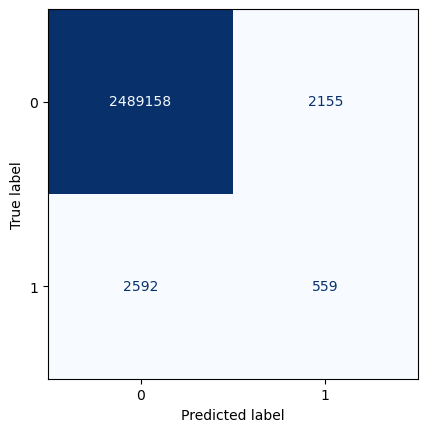

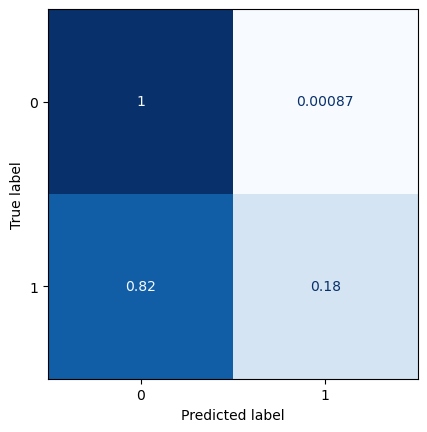

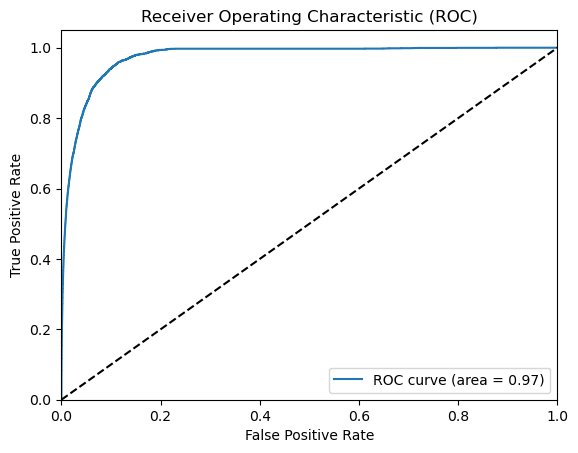

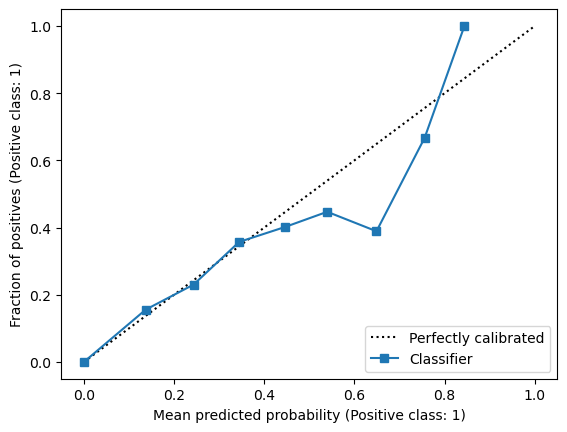

In [157]:
#test_img_std = pad_imags(test_img_std)
#y_test_img = pad_imags(y_test_img)

t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

#print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

#print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)



77/77 [==============================] - 29s 372ms/step


/Users/3rfanian/opt/anaconda3/envs/SHAP/lib/python3.10/site-packages/sklearn/metrics/_plot/confusion_matrix.py:129: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


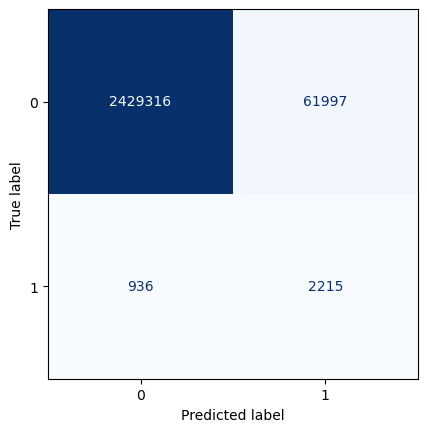

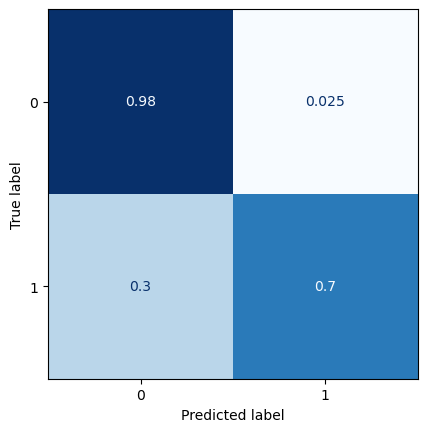

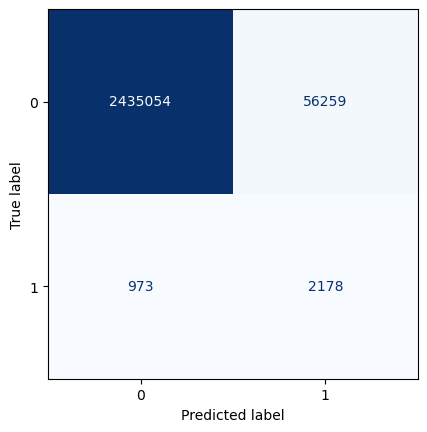

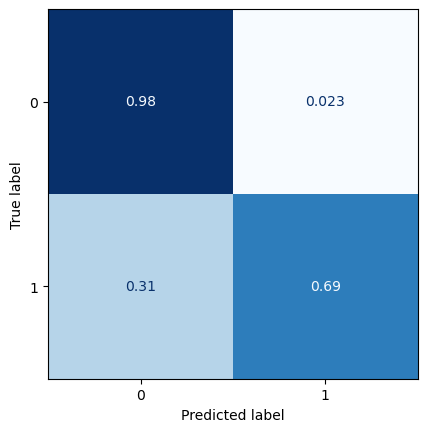

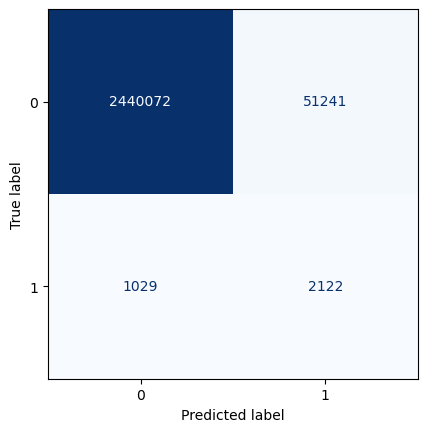

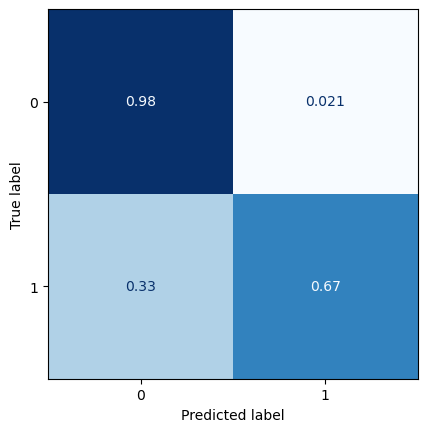

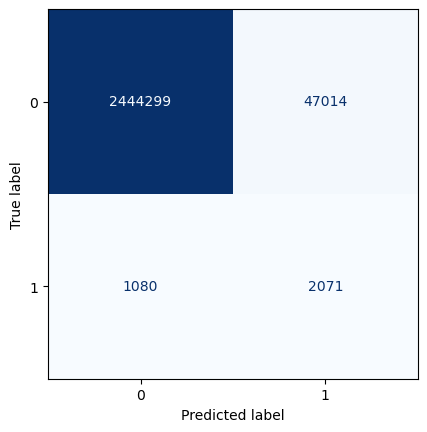

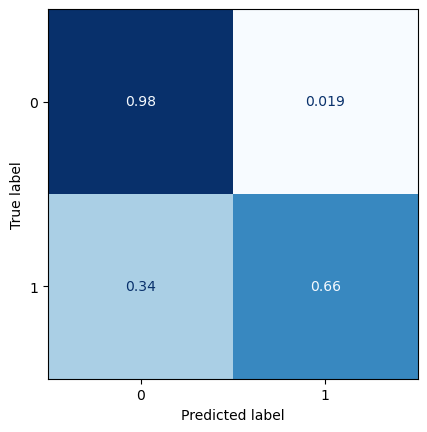

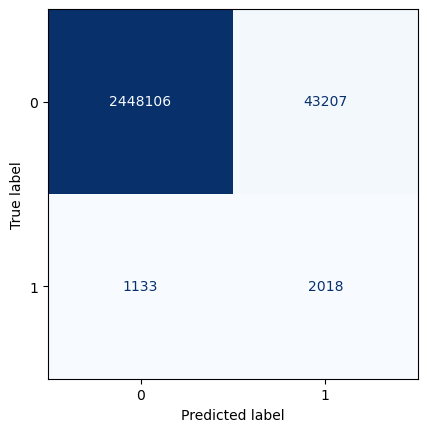

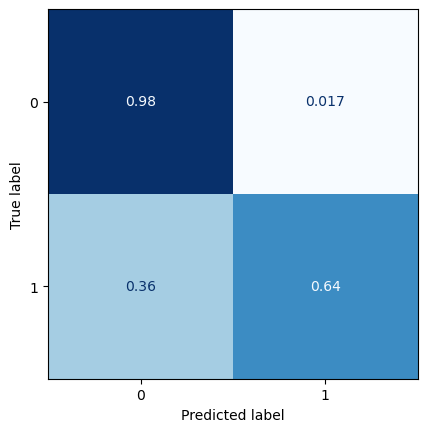

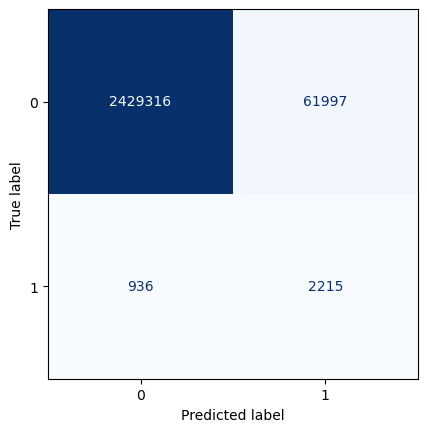

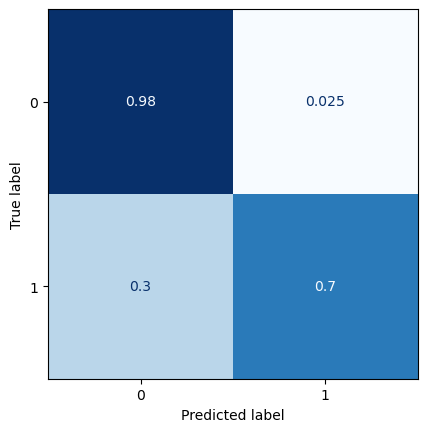

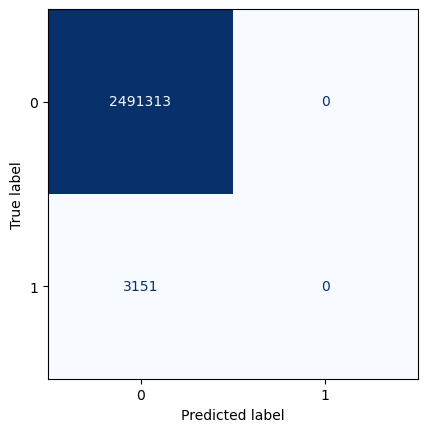

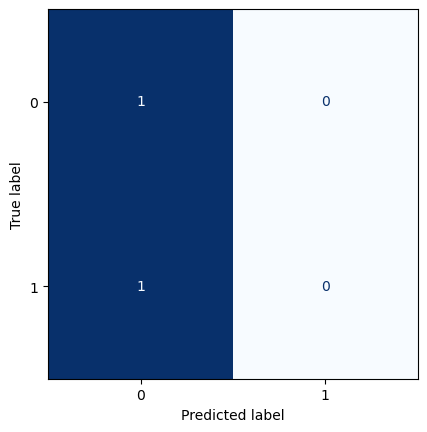

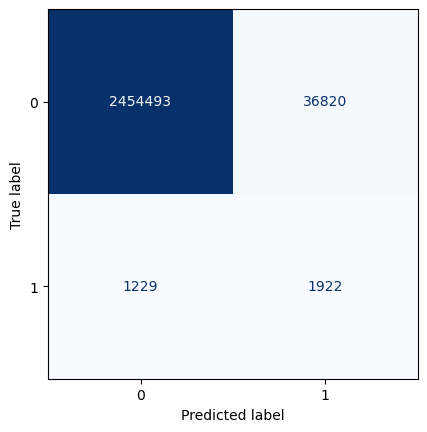

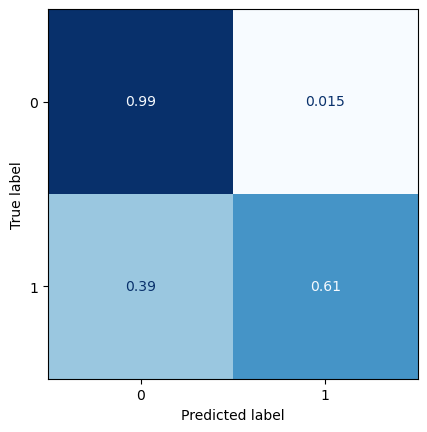

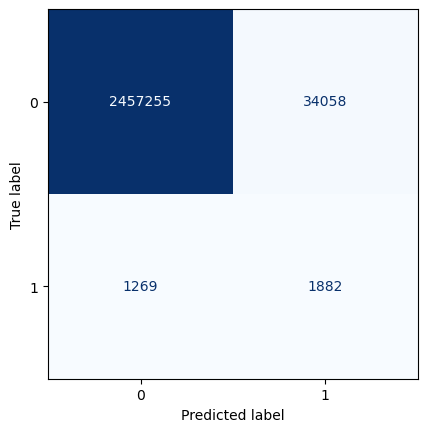

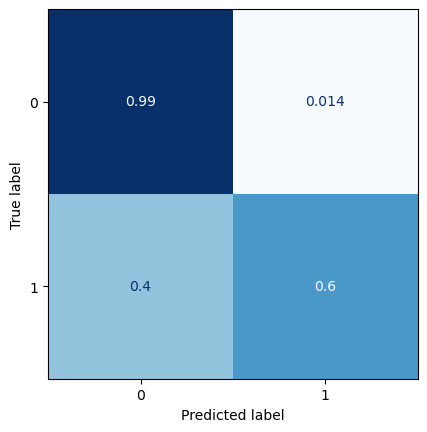

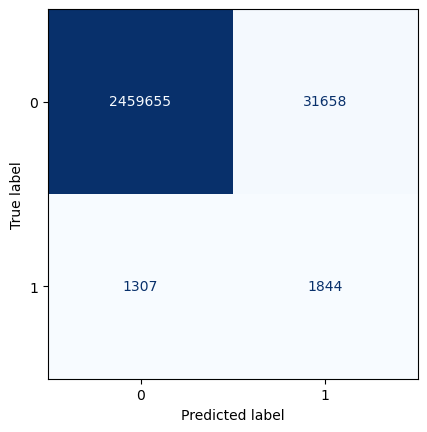

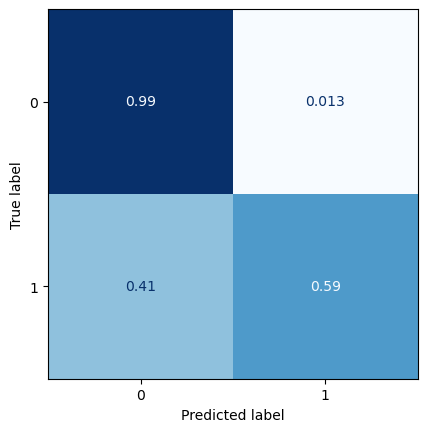

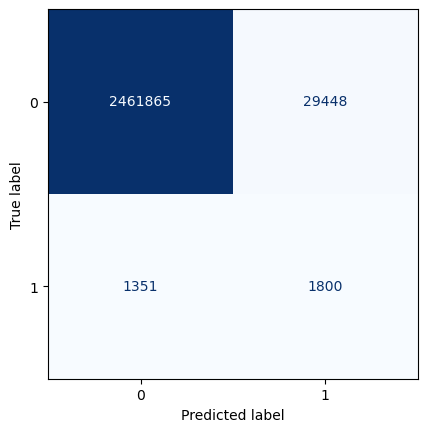

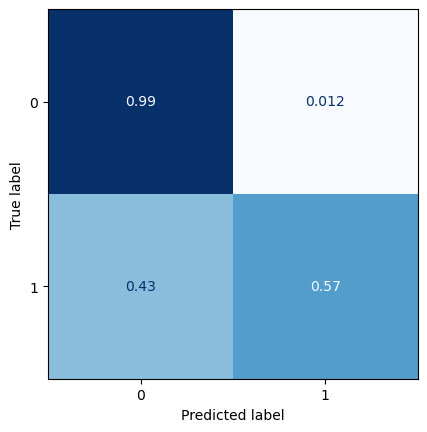

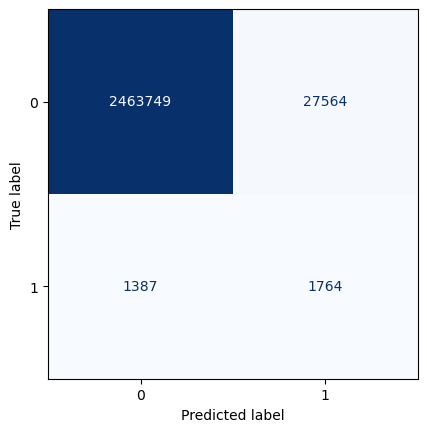

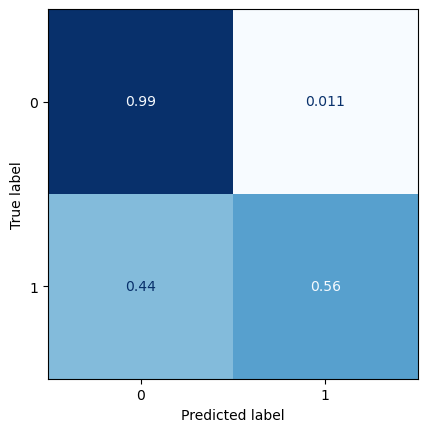

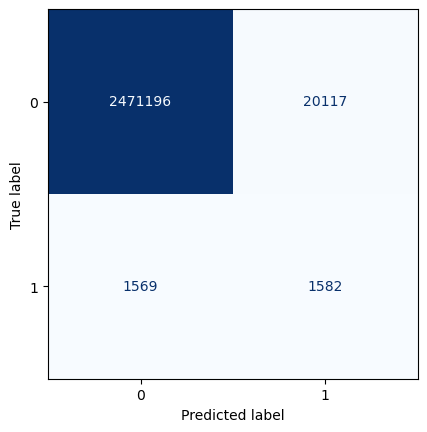

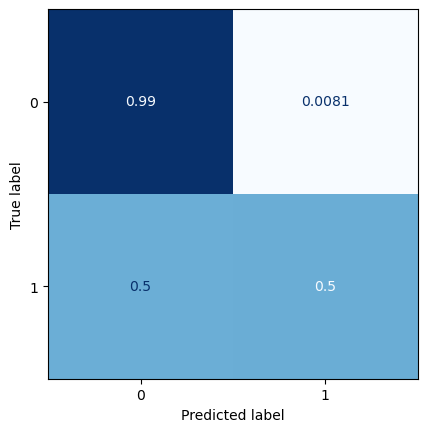

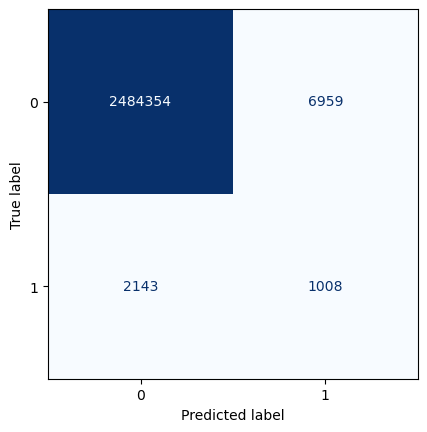

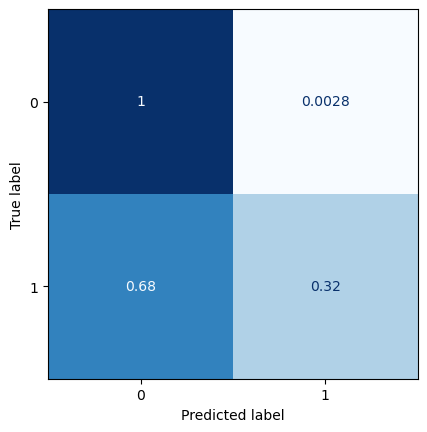

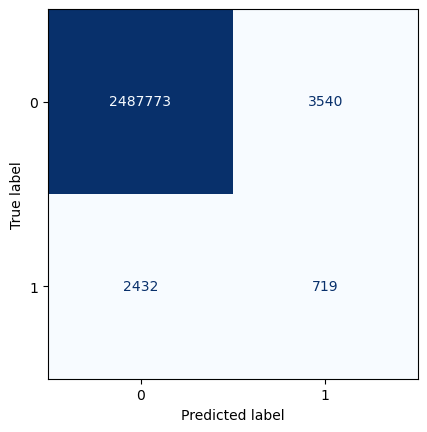

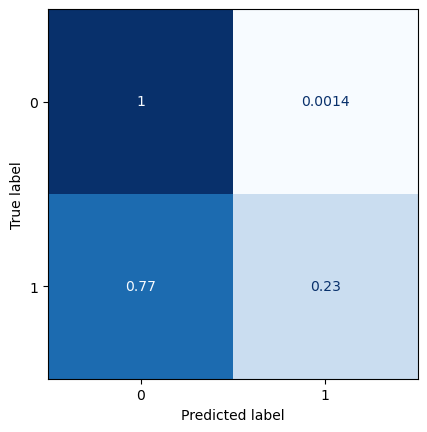

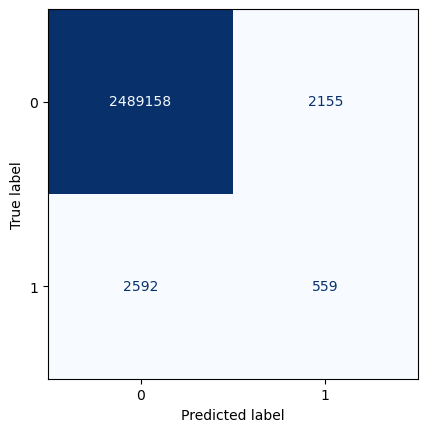

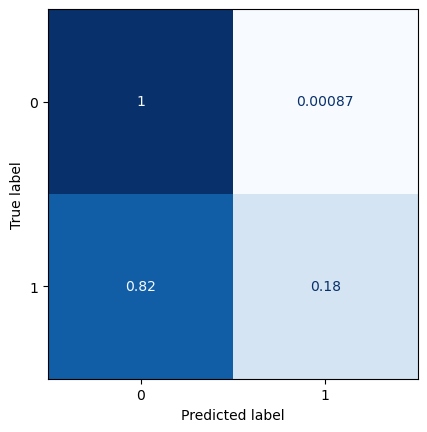

In [165]:
t = model.predict(test_img_std)

ranges = [0.01,0.011,0.012,0.013,0.014,0.01,5,0.016,0.017,0.018,0.019,0.02,0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


In [178]:
def model_4():
    h_grid = 96
    input_layer = Input(shape=(32,32,10))
    from keras.layers import Conv2DTranspose as DeConv
    resnet = tf.keras.applications.ResNet50(
        input_shape=[INPUT_WIDTH, INPUT_HEIGHT, N_CHANNELS],
        #padding='valid',
        # Removing the fully-connected layer at the top of the network.
        #  Unless you have the same number of labels as the original architecture, 
        #  you should remove it.
        include_top=False,  
        input_tensor=None,
        #input_shape=None,
        pooling=None,
        # Using no pretrained weights (random initialization)
        weights=None)
    resnet.trainable = False

    res_features = resnet(input_layer)

    conv = DeConv(1024, padding="valid", activation="relu", kernel_size=3)(res_features)
    conv = UpSampling2D((2,2))(conv)
    conv = DeConv(512, padding="valid", activation="relu", kernel_size=5)(conv)
    conv = UpSampling2D((2,2))(conv)
    conv = DeConv(128, padding="valid", activation="relu", kernel_size=5)(conv)
    conv = UpSampling2D((2,2))(conv)
    conv = DeConv(32, padding="valid", activation="relu", kernel_size=5)(conv)
    conv = UpSampling2D((2,2))(conv)
    conv = DeConv(8, padding="valid", activation="relu", kernel_size=5)(conv)
    conv = UpSampling2D((2,2))(conv)
    conv = DeConv(4, padding="valid", activation="relu", kernel_size=5)(conv)
    conv = DeConv(1, padding="valid", activation="sigmoid", kernel_size=5)(conv)
    conv = Cropping2D(cropping=((h_grid, h_grid)), name='cropping2d_1')(conv)
    model = Model(inputs=input_layer, outputs=conv)
    return model 

In [180]:
model = model_4()

model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_84 (InputLayer)       [(None, 32, 32, 10)]      0         
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23609664  
                                                                 
 conv2d_transpose_163 (Conv2  (None, 3, 3, 1024)       18875392  
 DTranspose)                                                     
                                                                 
 up_sampling2d_98 (UpSamplin  (None, 6, 6, 1024)       0         
 g2D)                                                            
                                                                 
 conv2d_transpose_164 (Conv2  (None, 10, 10, 512)      13107712  
 DTranspose)                                                     
                                                          

# Mobilenet

In [8]:
def model_3():
    h_grid = 3
    input_layer = Input(shape=(32,32,10))
    from keras.layers import Conv2DTranspose as DeConv
    resnet = tf.keras.applications.MobileNetV2(
        input_shape=[INPUT_WIDTH, INPUT_HEIGHT, N_CHANNELS],
        #padding='valid',
        # Removing the fully-connected layer at the top of the network.
        #  Unless you have the same number of labels as the original architecture, 
        #  you should remove it.
        include_top=False,  
        input_tensor=None,
        #input_shape=None,
        pooling=None,
        # Using no pretrained weights (random initialization)
        weights=None)
    resnet.trainable = False

    res_features = resnet(input_layer)

    conv = DeConv(1, padding="valid", activation="sigmoid", kernel_size=32)(res_features)
    #conv = UpSampling2D((2,2))(conv)
    #conv = DeConv(512, padding="valid", activation="relu", kernel_size=10)(conv)
    #conv = UpSampling2D((2,2))(conv)
    #conv = DeConv(128, padding="valid", activation="relu", kernel_size=5)(conv)
    #conv = UpSampling2D((2,2))(conv)
    #conv = DeConv(32, padding="valid", activation="relu", kernel_size=5)(conv)
    #conv = UpSampling2D((2,2))(conv)
    #conv = DeConv(8, padding="valid", activation="relu", kernel_size=5)(conv)
    #conv = UpSampling2D((2,2))(conv)
    #conv = DeConv(4, padding="valid", activation="relu", kernel_size=5)(conv)
    #conv = DeConv(1, padding="valid", activation="sigmoid", kernel_size=5)(conv)
    #conv = Cropping2D(cropping=((h_grid, h_grid)), name='cropping2d_1')(conv)
    model = Model(inputs=input_layer, outputs=conv)
    return model 

In [9]:
model = model_3()

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 10)]      0         
                                                                 
 mobilenetv2_1.00_32 (Functi  (None, 1, 1, 1280)       2260000   
 onal)                                                           
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 1)        1310721   
 ranspose)                                                       
                                                                 
Total params: 3,570,721
Trainable params: 1,310,721
Non-trainable params: 2,260,000
_________________________________________________________________


In [12]:
#validation_data=(pad_imags(val_img_std),pad_imags(y_val_img))
model.fit(pad_imags(train_img_std), pad_imags(y_train_img) ,validation_data=(pad_imags(val_img_std),pad_imags(y_val_img)),
        callbacks=[monitor],epochs=100)

Epoch 1/100
354/354 [==============================] - 24s 67ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 2/100
354/354 [==============================] - 23s 65ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 3/100
354/354 [==============================] - 21s 59ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 4/100
354/354 [==============================] - 24s 67ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 5/100
354/354 [==============================] - 23s 66ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 6/100
354/354 [==============================] - 22s 61ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 7/100
354/354 [==============================] - 22s 63ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 8/100
354/354 [==============================] - 23s 66ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 9/100
354/354 [==============================] - 21s 60ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 10/100
354/354 [==============================] - 23s 64ms/step - l

77/77 [==============================] - 3s 37ms/step


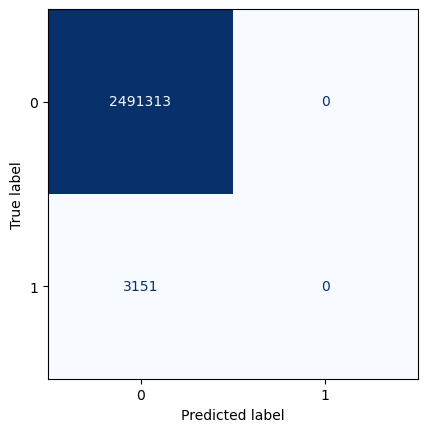

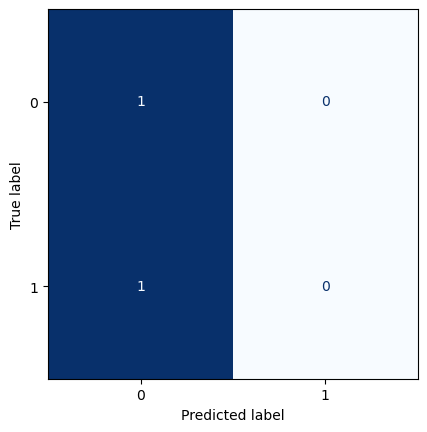

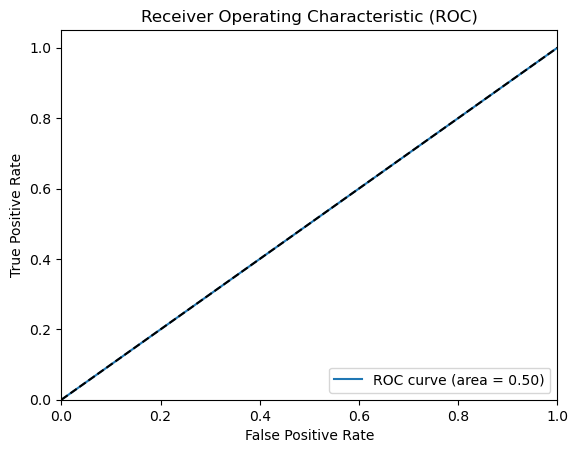

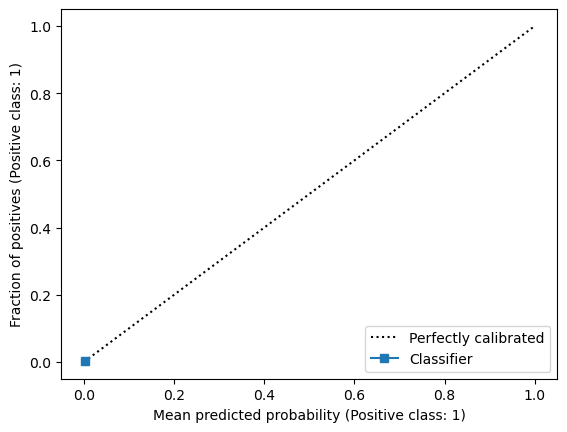

In [16]:
#test_img_std = pad_imags(test_img_std)
#y_test_img = pad_imags(y_test_img)

t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

#print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

#print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
type(classes)
# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

#ROC
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)


77/77 [==============================] - 3s 33ms/step


/Users/3rfanian/opt/anaconda3/envs/SHAP/lib/python3.10/site-packages/sklearn/metrics/_plot/confusion_matrix.py:129: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


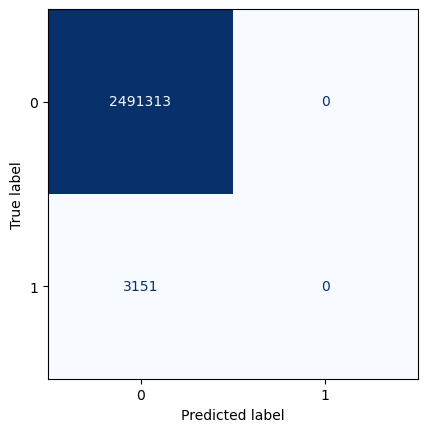

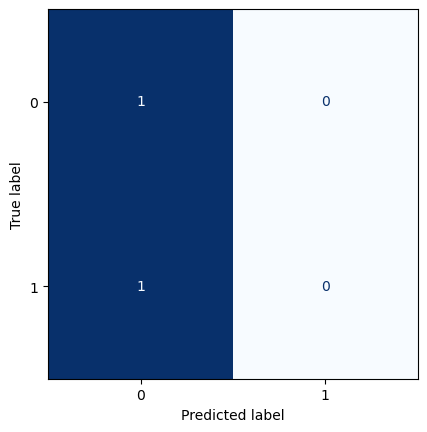

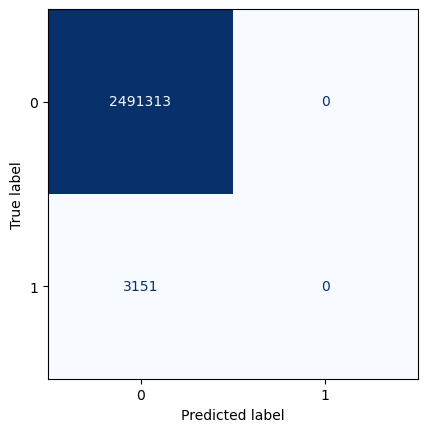

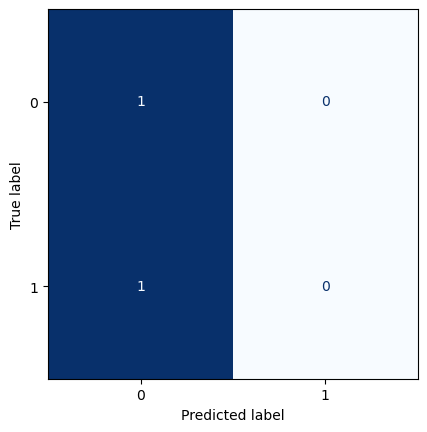

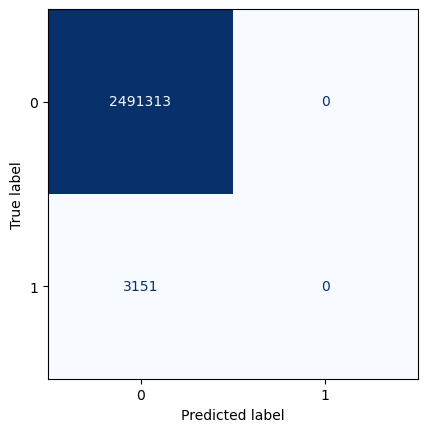

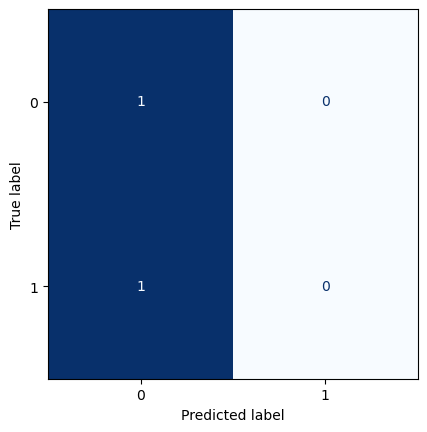

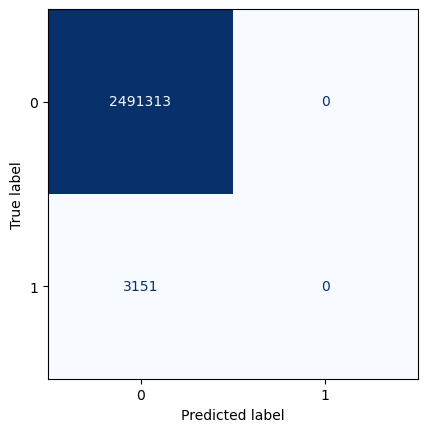

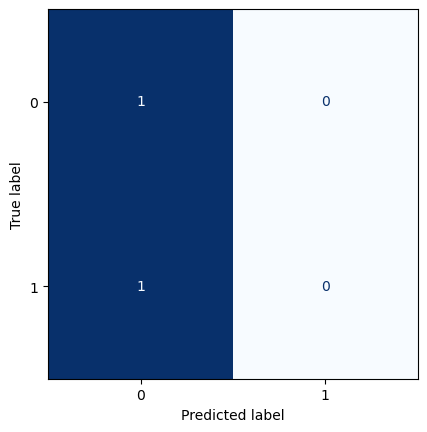

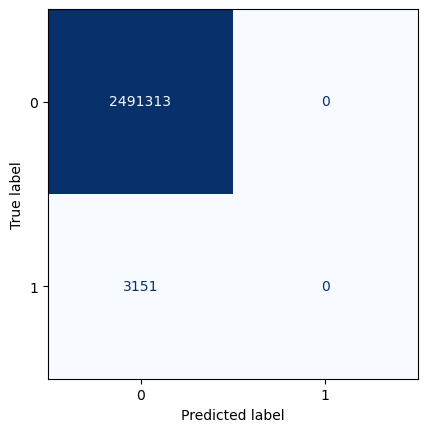

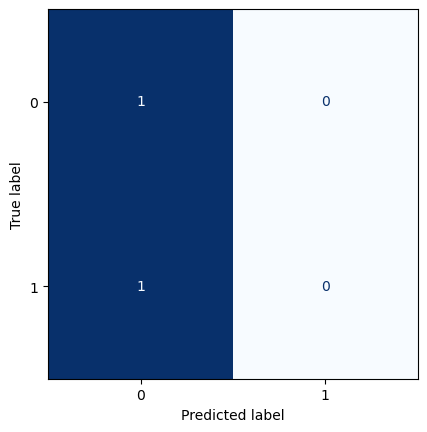

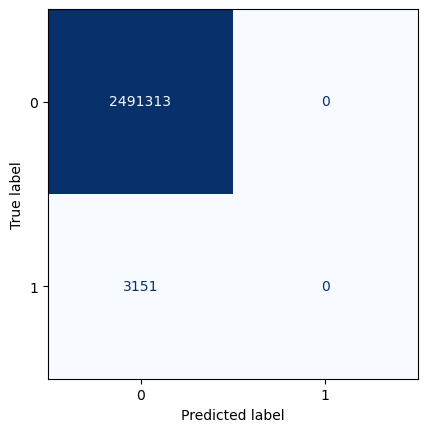

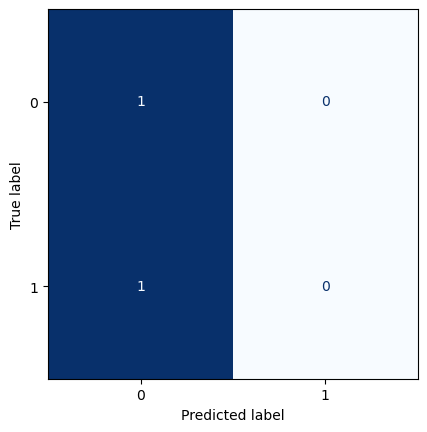

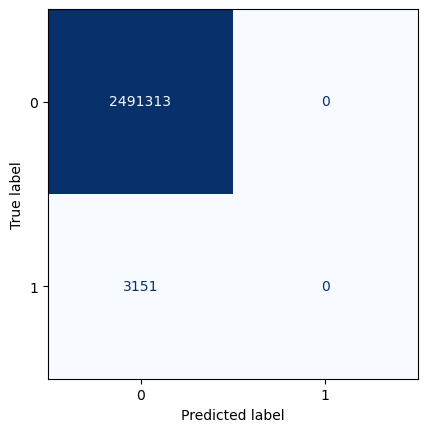

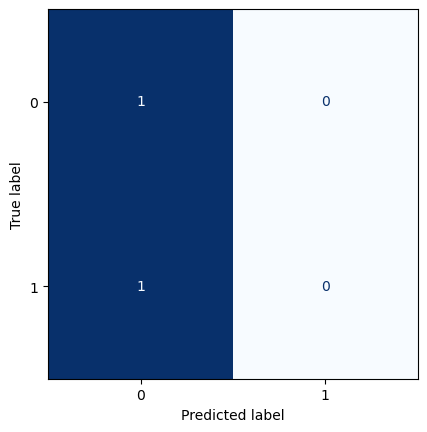

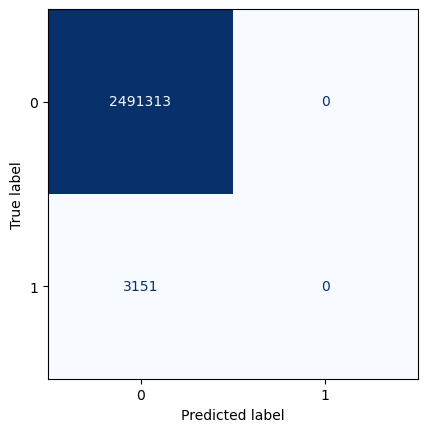

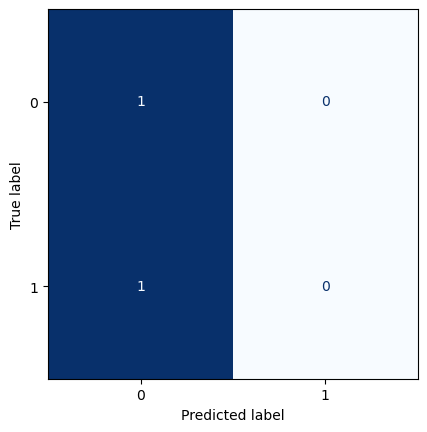

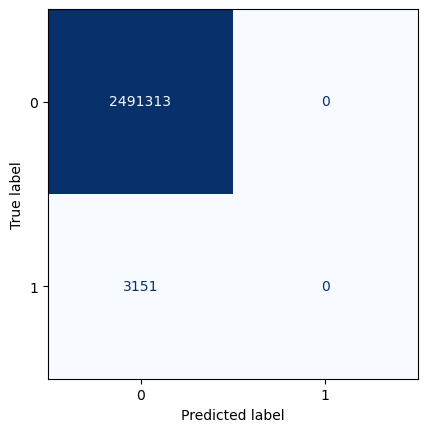

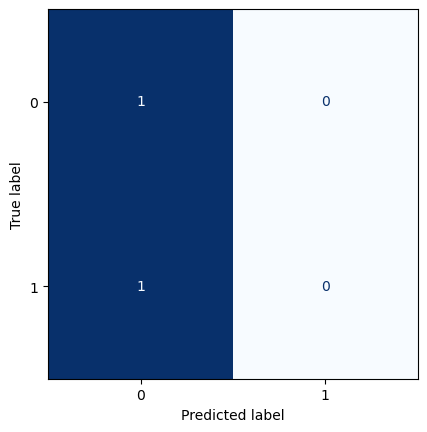

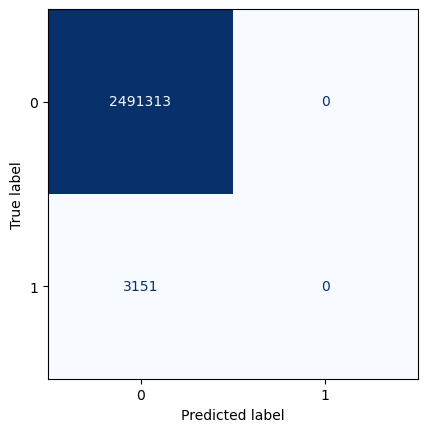

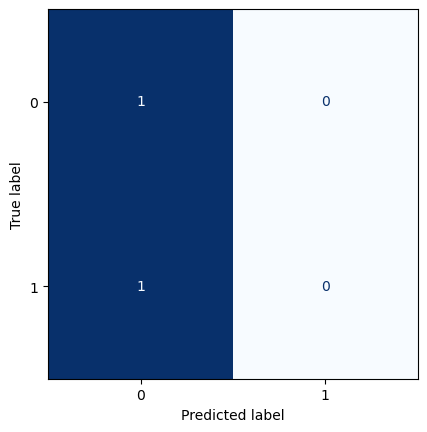

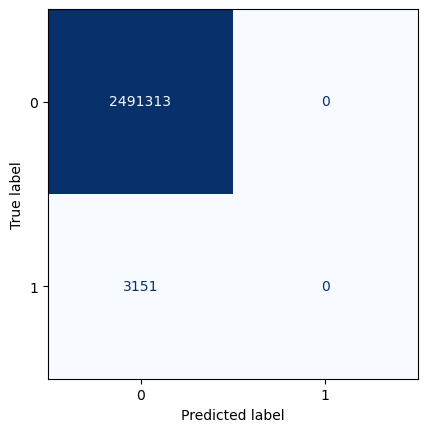

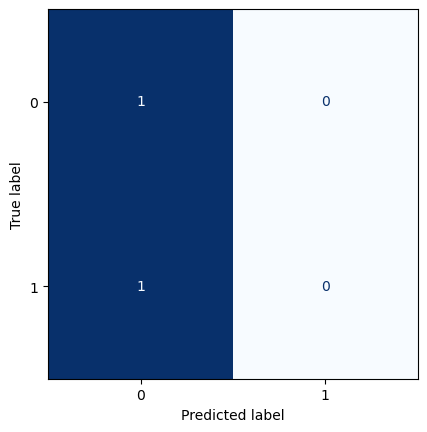

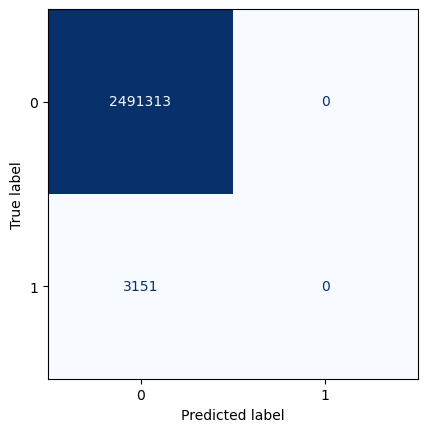

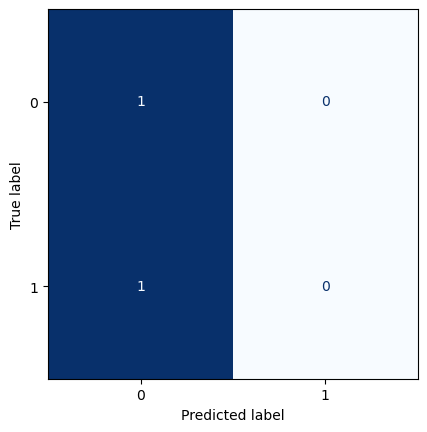

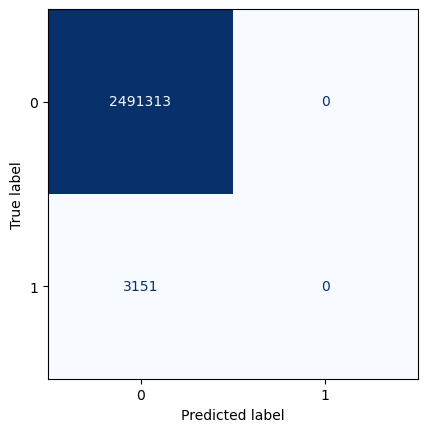

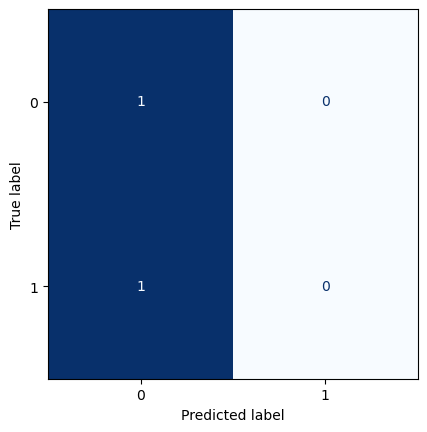

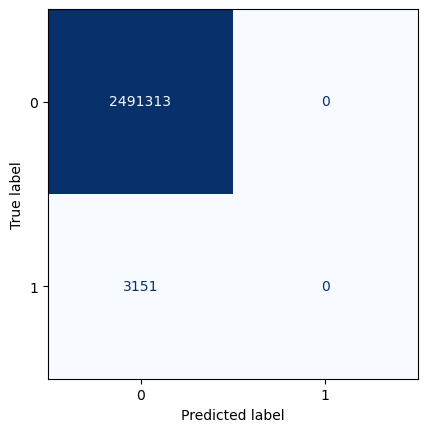

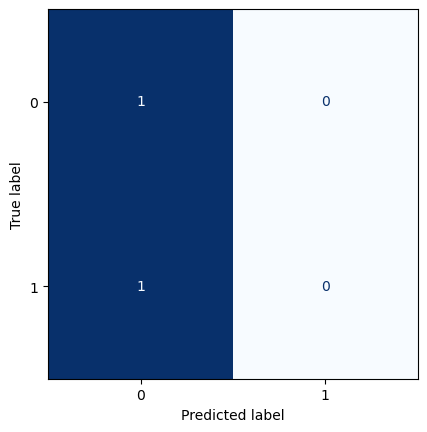

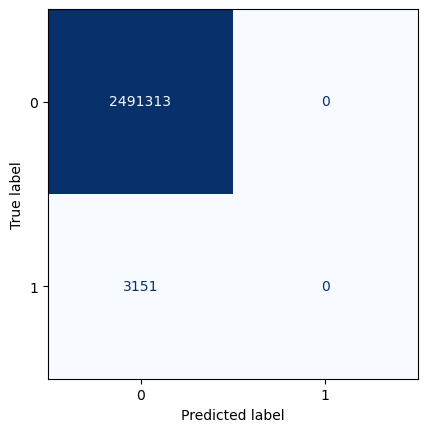

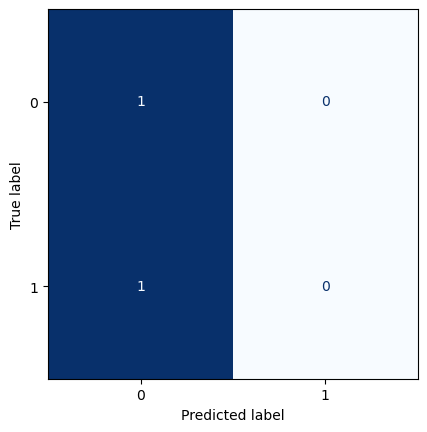

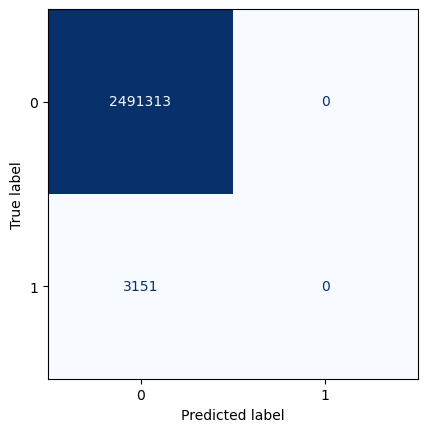

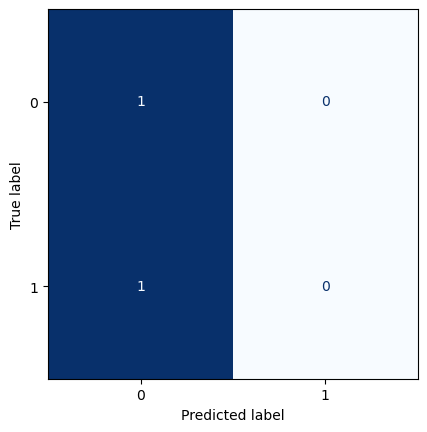

In [17]:
t = model.predict(test_img_std)

ranges = [0.01,0.011,0.012,0.013,0.014,0.01,5,0.016,0.017,0.018,0.019,0.02,0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


In [24]:
def model_4():
    h_grid = 96
    input_layer = Input(shape=(32,32,10))
    from keras.layers import Conv2DTranspose as DeConv
    resnet = tf.keras.applications.MobileNetV2(
        input_shape=[INPUT_WIDTH, INPUT_HEIGHT, N_CHANNELS],
        #padding='valid',
        # Removing the fully-connected layer at the top of the network.
        #  Unless you have the same number of labels as the original architecture, 
        #  you should remove it.
        include_top=False,  
        input_tensor=None,
        #input_shape=None,
        pooling=None,
        # Using no pretrained weights (random initialization)
        weights=None)
    resnet.trainable = False

    res_features = resnet(input_layer)

    conv = DeConv(1024, padding="valid", activation="relu", kernel_size=3)(res_features)
    conv = UpSampling2D((2,2))(conv)
    conv = DeConv(512, padding="valid", activation="relu", kernel_size=5)(conv)
    conv = UpSampling2D((2,2))(conv)
    conv = DeConv(128, padding="valid", activation="relu", kernel_size=5)(conv)
    conv = UpSampling2D((2,2))(conv)
    conv = DeConv(32, padding="valid", activation="relu", kernel_size=5)(conv)
    conv = UpSampling2D((2,2))(conv)
    conv = DeConv(8, padding="valid", activation="relu", kernel_size=5)(conv)
    conv = UpSampling2D((2,2))(conv)
    conv = DeConv(4, padding="valid", activation="relu", kernel_size=5)(conv)
    conv = DeConv(1, padding="valid", activation="sigmoid", kernel_size=5)(conv)
    conv = Cropping2D(cropping=((h_grid, h_grid)), name='cropping2d_1')(conv)
    model = Model(inputs=input_layer, outputs=conv)
    return model 

In [25]:
model = model_4()

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 10)]      0         
                                                                 
 mobilenetv2_1.00_32 (Functi  (None, 1, 1, 1280)       2260000   
 onal)                                                           
                                                                 
 conv2d_transpose_23 (Conv2D  (None, 3, 3, 1024)       11797504  
 Transpose)                                                      
                                                                 
 up_sampling2d_16 (UpSamplin  (None, 6, 6, 1024)       0         
 g2D)                                                            
                                                                 
 conv2d_transpose_24 (Conv2D  (None, 10, 10, 512)      13107712  
 Transpose)                                                

In [27]:
#validation_data=(pad_imags(val_img_std),pad_imags(y_val_img))
model.fit(pad_imags(train_img_std), pad_imags(y_train_img) ,validation_data=(pad_imags(val_img_std),pad_imags(y_val_img)),
        callbacks=[monitor],epochs=1)

Epoch 1/5
354/354 [==============================] - 2223s 6s/step - loss: 0.0237 - val_loss: 0.0209
Epoch 2/5
293/354 [=======================>......] - ETA: 5:46 - loss: 0.0238

KeyboardInterrupt: 